<a href="https://colab.research.google.com/github/jonathanahc/Proyecto/blob/main/ProyectoProgADAP_255497NvaVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Consumo y Costo del Agua en Nueva York
## Grupo: A
## Autor: Jonathan Adrian Herrera Castro
## Matrícula: 255497
## Fecha: 08/03/2025

# **1. Introducción**



## **- Descripción del problema:** el objetivo de este análisis es examinar el consumo de agua en la ciudad de Nueva York y su costo asociado, con el fin de identificar tendencias y algunos factores que influyen en su variación. Se analizarán patrones de consumo en distintas zonas y sectores de febrero del 2013 hasta 2023.

## **- Objetivo del análisis:** comprender el consumo y costo del agua en Nueva York para identificar patrones y factores que afectan su variabilidad. Este análisis tiene como impacto en el tema de la optimización el uso del agua, la planificación de tarifas y establecer algunas estrategias de sostenibilidad.

## **- Fuente de datos:** los datos utilizados en este análisis provienen de NYC Open Data, una plataforma que ofrece bases de datos de acceso público. La información fue proporcionada por la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés).

# **2. Información General del Conjunto de Datos**

El conjunto de datos sobre el consumo y costo del agua en Nueva York pertenece a la categoría de gestión de recursos hídricos urbanos, que abarca el análisis y control de la distribución de agua potable y la fijación de tarifas. Los datos recopilados incluyen información sobre el volumen de agua consumido en diferentes áreas de la ciudad, las tarifas establecidas para los consumidores, patrones de consumo y variaciones de precios. La fuente principal de estos datos es la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés), los informes y los datos sobre el consumo de agua se publican anualmente y están disponibles al público en su sitio web oficial.

El enlace para acceder a la base de datos es:
[Water Consumption And Cost (2013 - Feb 2025)](https://data.cityofnewyork.us/Housing-Development/Water-Consumption-And-Cost-2013-Feb-2025-/66be-66yr/about_data)

Estos datos se pueden encontrar en formato CSV lo cual facilita su acceso y análisis y son utilizados para diversos fines como el análisis - planificación de políticas públicas, gestión - mantenimiento de infraestructura y para pronósticos y ajustes tarifarios.

#**3. Descripción del Conjunto de Datos**


Como primera fase, se emplearon diversas librerías para facilitar el proceso de carga del archivo CSV. La primera librería utilizada fue google.colab, la cual establece la conexión a la carpeta Drive donde se encuentra almacenado el archivo. Además, se importaron las librerías Pandas y Re para interactuar con los datos.

In [468]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Con esta sentencia, se cargó el archivo CSV en un dataframe sin presentar inconvenientes durante el proceso.

In [469]:
df = pd.read_csv('/content/drive/MyDrive/ProyectoProgramacion/Water_Consumption_And_Cost__2013_-_Feb_2023__20250216.csv', engine="python")

Una vez cargado el archivo, se validó que los datos se mostrarán correctamente.

In [470]:
df.head(3)

Development Name   Borough   Account Name Location Meter AMR Meter Scope  \
0    HOWARD AVENUE  BROOKLYN  HOWARD AVENUE   BLD 02       AMR         NaN   
1     BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09       AMR      BLD 09   
2     BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09       AMR      BLD 09   

   TDS #  EDP  RC Code Funding Source  ... Service End Date # days  \
0  339.0  782  K033900        FEDERAL  ...       04/23/2020   31.0   
1   91.0  240  Q009100        FEDERAL  ...       01/26/2020   34.0   
2   91.0  240  Q009100        FEDERAL  ...       02/24/2020   29.0   

   Meter Number Estimated Current Charges             Rate Class  \
0     E11310572         N         2945.22  Basic Water and Sewer   
1     K13060723         N          196.35  Basic Water and Sewer   
2     K13060723         N          258.35  Basic Water and Sewer   

   Bill Analyzed Consumption (HCF) Water&Sewer Charges  Other Charges  
0            Yes               285             2945.22            0.0  
1            Yes                19              196.35            0.0  
2            Yes                25              258.35            0.0  

[3 rows x 25 columns]

Utilizando la función Shape, se realizó un conteo del número de filas y columnas del dataframe.

In [471]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 50315, Columnas: 25


Después del conteo, se utilizó la función Info con la cual se obtuvó la información sobre las columnas, incluyendo el nombre y el tipo de dato de cada una.

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50315 entries, 0 to 50314
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Development Name     50255 non-null  object 
 1   Borough              50315 non-null  object 
 2   Account Name         50315 non-null  object 
 3   Location             49487 non-null  object 
 4   Meter AMR            49805 non-null  object 
 5   Meter Scope          12782 non-null  object 
 6   TDS #                50255 non-null  float64
 7   EDP                  50315 non-null  int64  
 8   RC Code              50315 non-null  object 
 9   Funding Source       50239 non-null  object 
 10  AMP #                50193 non-null  object 
 11  Vendor Name          50315 non-null  object 
 12  UMIS BILL ID         50315 non-null  int64  
 13  Revenue Month        50315 non-null  object 
 14  Service Start Date   50308 non-null  object 
 15  Service End Date     50308 non-null 

Con la función Describe se proporcionó un resumen estadístico de cada columna.

In [473]:
df.describe(include='all')

Development Name Borough  \
count                              50255   50315   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4765   23460   
mean                                 NaN     NaN   
std                                  NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   

                            Account Name Location Meter AMR       Meter Scope  \
count                              50315    49487     49805             12782   
unique                               117      305         3                59   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01       AMR  Community Center   
freq                                4759     4459     43782              1228   
mean                                 NaN      NaN       NaN               NaN   
std                                  NaN      NaN       NaN               NaN   
min                                  NaN      NaN       NaN               NaN   
25%                                  NaN      NaN       NaN               NaN   
50%                                  NaN      NaN       NaN               NaN   
75%                                  NaN      NaN       NaN               NaN   
max                                  NaN      NaN       NaN               NaN   

               TDS #           EDP  RC Code Funding Source  ...  \
count   50255.000000  50315.000000    50315          50239  ...   
unique           NaN           NaN      114              6  ...   
top              NaN           NaN  Q026000        FEDERAL  ...   
freq             NaN           NaN     4765          45346  ...   
mean      258.871794    463.205764      NaN            NaN  ...   
std       101.467018    185.109210      NaN            NaN  ...   
min         1.000000    200.000000      NaN            NaN  ...   
25%       209.000000    325.000000      NaN            NaN  ...   
50%       273.000000    396.000000      NaN            NaN  ...   
75%       338.000000    637.000000      NaN            NaN  ...   
max       559.000000    999.000000      NaN            NaN  ...   

       Service End Date        # days  Meter Number Estimated Current Charges  \
count             50308  50308.000000         50315     50315    50315.000000   
unique             1114           NaN           795         2             NaN   
top          03/24/2019           NaN    UN-METERED         N             NaN   
freq                594           NaN           179     41499             NaN   
mean                NaN     33.182953           NaN       NaN     2150.221066   
std                 NaN     53.181840           NaN       NaN     5623.852543   
min                 NaN   -335.000000           NaN       NaN    -1748.510000   
25%                 NaN     29.000000           NaN       NaN       46.460000   
50%                 NaN     30.000000           NaN       NaN      197.360000   
75%                 NaN     32.000000           NaN       NaN     2598.415000   
max                 NaN   6968.000000           NaN       NaN   392036.460000   

                   Rate Class  Bill Analyzed Consumption (HCF)  \
count                   50279          50315      50315.000000   
unique                      5              2               NaN   
top     Basic Water and Sewer            Yes               NaN   
freq                    50175          49235               NaN   
mean                      NaN            NaN        224.291066   
std                       NaN            NaN       2020.962056   
min                       NaN            NaN          0.000000   
25%                       NaN            NaN          5.000000   
50%                       NaN            NaN         2

# **4. Limpieza y Transformación del Conjunto de Datos**


Antes de proceder con la limpieza y transformación de los datos, se llevó a cabo un análisis detallado de las columnas del dataframe, basado en las estadísticas previamente calculadas. Este análisis tuvo como objetivo identificar variables irrelevantes y caracterizar la distribución de los datos para optimizar su tratamiento en las siguientes etapas del proceso.

Con base en este análisis, se determinó que las columnas Meter AMR, Meter Scope, EDP, Funding Source, AMP #, Vendor Name, Estimated y Bill Analyzed serían eliminadas, ya que no aportaban un valor significativo al análisis del dataframe y presentaban una baja variabilidad en la distribución de los datos.

A continuación, se presentan las gráficas que ilustran la distribución de los datos de las columnas eliminadas.

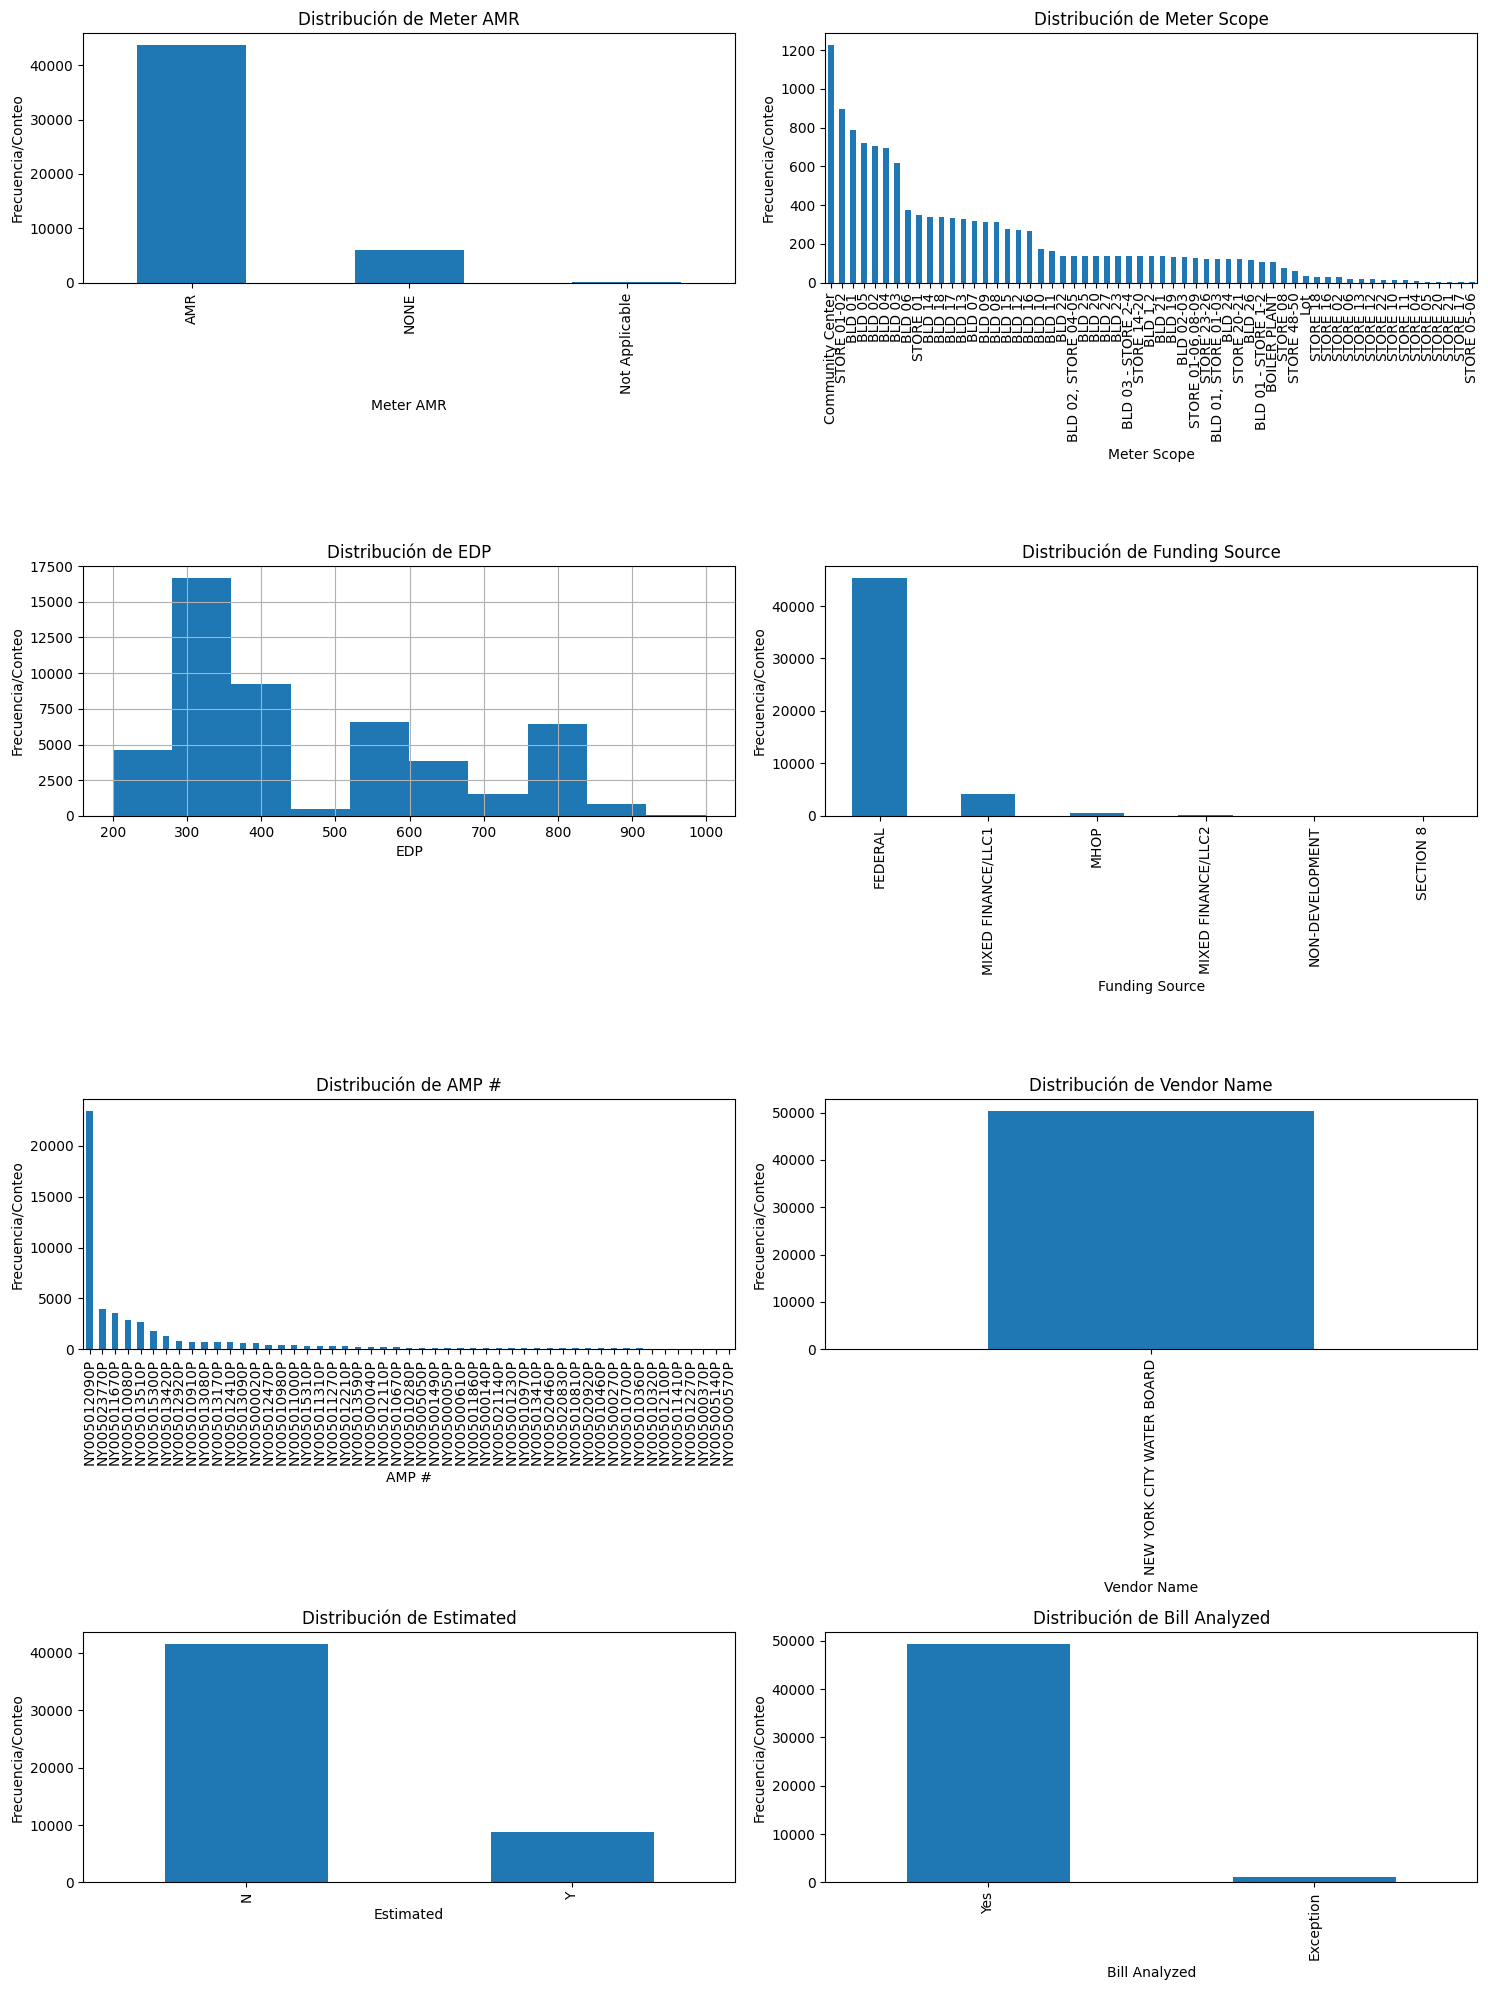

In [474]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.ravel()


columns_to_plot = ['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed']

for i, col in enumerate(columns_to_plot):
    try:
        if col in df.columns:
          if df[col].dtype == 'object':
              df[col].value_counts().plot(kind='bar', ax=axes[i])
          else:
              df[col].hist(ax=axes[i])
          axes[i].set_title(f'Distribución de {col}')
          axes[i].set_xlabel(col)
          axes[i].set_ylabel('Frecuencia/Conteo')
        else:
          axes[i].set_title(f"Column '{col}' no encontrada en Dataframe")

    except Exception as e:
        axes[i].set_title(f"Error al trazar {col}: {e}")

plt.tight_layout()
plt.show()


A continuación se muestra el código para eliminación de las columnas.

In [475]:
df = df.drop(columns=['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed'])

###***Normalización de Nombres de Columnas***

Como primer paso en el proceso de normalización, se presentó una visión general de todas las columnas del DataFrame.

In [476]:
df.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'TDS #',
       'RC Code', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Current Charges',
       'Rate Class', 'Consumption (HCF)', 'Water&Sewer Charges',
       'Other Charges'],
      dtype='object')

A continuación, se identificaron las columnas que contenían caracteres especiales o espacios en blanco mediante una expresión regular.

In [477]:
for col in df.columns:
    if re.search(r'[^\w\s]', col) or re.search(r'\s', col):
      print(col)

Development Name
Account Name
TDS #
RC Code
UMIS BILL ID
Revenue Month
Service Start Date
Service End Date
# days
Meter Number
Current Charges
Rate Class
Consumption (HCF)
Water&Sewer Charges
Other Charges


Tras identificar las columnas, se procedió a su normalización mediante una expresión regular, lo que realizar esta expresión es reemplazar todos los caracteres que no sean alfanuméricos por una cadena vacía. Además, se aplicó la función lower() para convertir todos los nombres de las columnas a minúsculas.

In [478]:
df.columns = df.columns.str.lower().str.replace(r"\W+", "", regex=True)

Una vez completada la normalización, se verificaron los nombres de todas las columnas.

In [479]:
df.columns

Index(['developmentname', 'borough', 'accountname', 'location', 'tds',
       'rccode', 'umisbillid', 'revenuemonth', 'servicestartdate',
       'serviceenddate', 'days', 'meternumber', 'currentcharges', 'rateclass',
       'consumptionhcf', 'watersewercharges', 'othercharges'],
      dtype='object')

###***Limpieza, Transformación y Normalización de Datos Temporales***

En esta sección, se trabajó con los datos temporales. Primero, la columna revenuemonth se convirtió al tipo Datetime, respetando el mismo formato presente en el archivo CSV.

In [480]:
df['revenuemonth'] = pd.to_datetime(df['revenuemonth'], format='%Y-%m')

A continuación, las columnas servicestartdate y serviceenddate se convirtieron al tipo Datetime, respetando el formato del archivo CSV.

Además, se implementó una estrategia para manejar los valores nulos, la cual consistió en reemplazarlos por NaT, ya que no se observa una secuencia en los valores de dichas columnas.

In [481]:
df['servicestartdate'] = pd.to_datetime(df['servicestartdate'], format='%m/%d/%Y', errors="coerce")
df['serviceenddate'] = pd.to_datetime(df['serviceenddate'], format='%m/%d/%Y', errors="coerce")

Por último, se verificó el nuevo tipo de datos en las columnas.

In [482]:
df[['revenuemonth', 'servicestartdate', 'serviceenddate']].dtypes

revenuemonth        datetime64[ns]
servicestartdate    datetime64[ns]
serviceenddate      datetime64[ns]
dtype: object

###***Corrección de Tipos de Datos y Manejo de Datos Perdidos***

Para el proceso de corrección de tipos de datos, primero se presentó una visión general del tipo de dato en cada columna.

In [483]:
df.dtypes

developmentname              object
borough                      object
accountname                  object
location                     object
tds                         float64
rccode                       object
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                        float64
meternumber                  object
currentcharges              float64
rateclass                    object
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Además de verificar el tipo de cada columna, se comprobó la presencia de datos perdidos en ellas.

In [484]:
df.isnull().sum()

developmentname       60
borough                0
accountname            0
location             828
tds                   60
rccode                 0
umisbillid             0
revenuemonth           0
servicestartdate       7
serviceenddate         7
days                   7
meternumber            0
currentcharges         0
rateclass             36
consumptionhcf         0
watersewercharges      0
othercharges           0
dtype: int64

Además, se llevó a cabo una revisión del uso de memoria de cada columna.

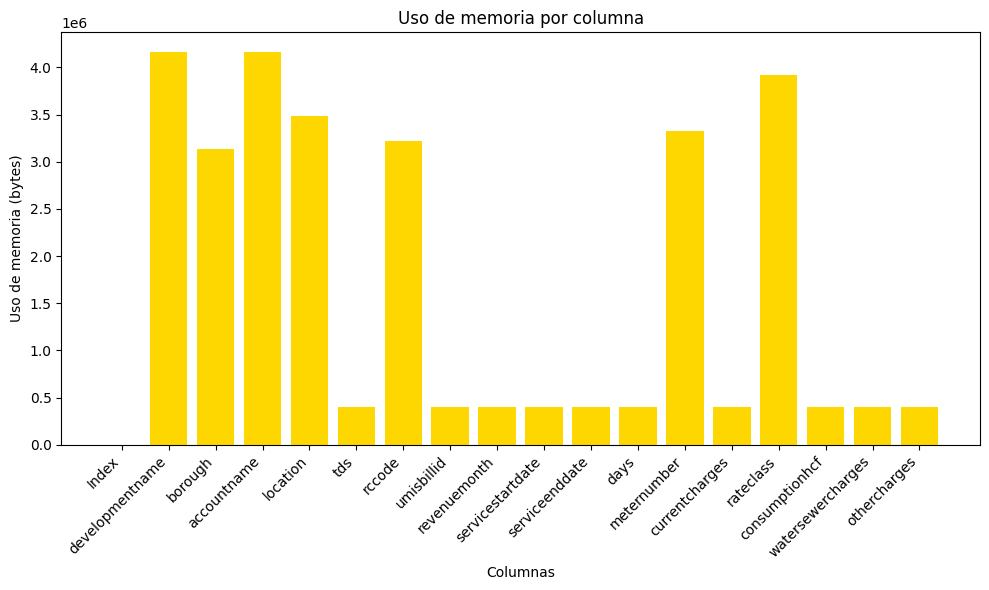

In [485]:
memory_usage = df.memory_usage(deep=True)

plt.figure(figsize=(10, 6))
plt.bar(memory_usage.index, memory_usage.values, color='gold')
plt.xlabel("Columnas")
plt.ylabel("Uso de memoria (bytes)")
plt.title("Uso de memoria por columna")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Después de revisar los valores nulos y tipo de dato se procedió con la corrección de los tipos de datos. Primero, las columnas tds y days fueron convertidas a tipo Int, ya que contienen únicamente valores enteros.

Para los valores nulos, se aplicó la estrategia de interpolación, dado que los datos siguen una secuencia lógica, lo que permite estimar los valores faltantes en función de sus vecinos.

In [486]:
df['tds'] = df['tds'].interpolate().astype(int)
df['days'] = df['days'].interpolate().astype(int)

Las columnas rccode y meternumber fueron convertidas al tipo Str.


In [487]:
df['rccode'] = df['rccode'].astype(str)
df['meternumber'] = df['meternumber'].astype(str)

Finalmente, las columnas restantes de tipo object fueron convertidas a category para optimizar el uso de memoria.

En cuanto a los valores nulos, se aplicó la estrategia de imputación por moda, ya que cada columna contenía un término recurrente, considerado el valor más probable para reemplazar los datos perdidos.

In [488]:
columnas = df.select_dtypes(include=['object']).columns

for col in columnas:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda).astype('category')

Como parte del proceso de limpieza, se llevó a cabo una verificación de las columnas de tipo numérico con el objetivo de validar la integridad de los datos y detectar posibles discrepancias.

In [489]:
print(df[df['tds'] < 0]['tds'].value_counts())
print("\n")
print(df[df['umisbillid'] < 0]['umisbillid'].value_counts())
print("\n")
print(df[df['days'] < 0]['days'].value_counts())
print("\n")
print(df[df['currentcharges'] < 0]['currentcharges'].value_counts())
print("\n")
print(df[df['consumptionhcf'] < 0]['consumptionhcf'].value_counts())
print("\n")
print(df[df['watersewercharges'] < 0]['watersewercharges'].value_counts())
print("\n")
print(df[df['othercharges'] < 0]['othercharges'].value_counts())


Series([], Name: count, dtype: int64)


Series([], Name: count, dtype: int64)


days
-335    6
-57     1
Name: count, dtype: int64


currentcharges
-44.55      1
-15.21      1
-1390.99    1
-1748.51    1
Name: count, dtype: int64


Series([], Name: count, dtype: int64)


Series([], Name: count, dtype: int64)


othercharges
-10.00       98
-40.09        1
-48.82        1
-28.95        1
-60.88        1
-1194.02      1
-8614.29      1
-9838.30      1
-1272.96      1
-5744.85      1
-1519.66      1
-15049.09     1
-1700.19      1
-76.48        1
-0.55         1
-1.60         1
-59.21        1
-0.02         1
-5723.38      1
-67726.83     1
-937.44       1
-2.05         1
-1082.80      1
-1737.52      1
-3866.51      1
-5000.00      1
-1188.29      1
-326.45       1
-126.67       1
-38.49        1
-253.32       1
-2684.02      1
-36.80        1
-11.80        1
-54.55        1
-133.64       1
-5.15         1
-4.85         1
-4.46         1
-5.54         1
-12.45        1
-10901.99     1
-55

Con base en los resultados obtenidos, se identificó la presencia de valores negativos en las columnas days, currentcharges y othercharges, los cuales podrían ser outliers y afectar el rendimiento de los modelos predictivos. Por esta razón, se procedió a la eliminación específica de los registros que contenían estos valores.

In [490]:
df.drop(df[df['days'] < 0].index, inplace=True)
df.drop(df[df['currentcharges'] < 0].index, inplace=True)
df.drop(df[df['othercharges'] < 0].index, inplace=True)

Después de haber realizado el proceso de la corrección y limpieza, se verificó el nuevo tipo de dato en las columnas.

In [491]:
df.dtypes

developmentname            category
borough                    category
accountname                category
location                   category
tds                           int64
rccode                     category
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                          int64
meternumber                category
currentcharges              float64
rateclass                  category
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Además, se realizó una nueva validación de los valores nulos.

Cabe destacar que en las columnas servicestartdate y serviceenddate, los valores nulos se representan como NaT.

In [492]:
df.isnull().sum()

developmentname      0
borough              0
accountname          0
location             0
tds                  0
rccode               0
umisbillid           0
revenuemonth         0
servicestartdate     7
serviceenddate       7
days                 0
meternumber          0
currentcharges       0
rateclass            0
consumptionhcf       0
watersewercharges    0
othercharges         0
dtype: int64

Además, se llevó a cabo una evaluación del uso de memoria con los tipos de datos modificados en las columnas.

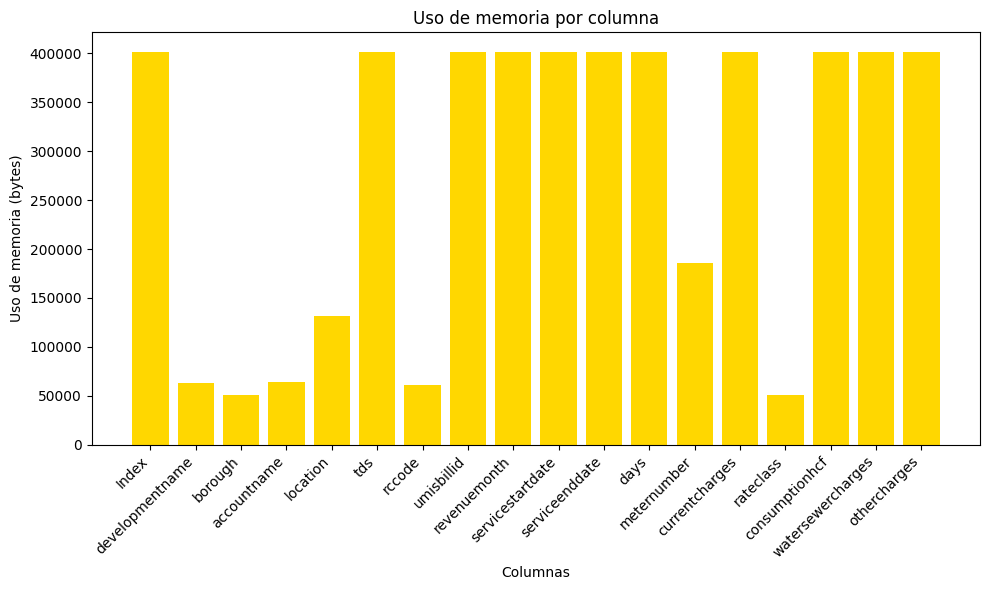

In [493]:
memory_usage = df.memory_usage(deep=True)

plt.figure(figsize=(10, 6))
plt.bar(memory_usage.index, memory_usage.values, color='gold')
plt.xlabel("Columnas")
plt.ylabel("Uso de memoria (bytes)")
plt.title("Uso de memoria por columna")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Así quedó el DataFrame con los cambios realizados.

In [494]:
df.head()

developmentname   borough    accountname location  tds   rccode  umisbillid  \
0   HOWARD AVENUE  BROOKLYN  HOWARD AVENUE   BLD 02  339  K033900     8870656   
1    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8562430   
2    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8667039   
3    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8759719   
4    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8870760   

  revenuemonth servicestartdate serviceenddate  days meternumber  \
0   2020-04-01       2020-03-23     2020-04-23    31   E11310572   
1   2020-01-01       2019-12-23     2020-01-26    34   K13060723   
2   2020-02-01       2020-01-26     2020-02-24    29   K13060723   
3   2020-03-01       2020-02-24     2020-03-23    28   K13060723   
4   2020-04-01       2020-03-23     2020-04-23    31   K13060723   

   currentcharges              rateclass  consumptionhcf  watersewercharges  \
0         2945.22  Basic Water and Sewer             285            2945.22   
1          196.35  Basic Water and Sewer              19             196.35   
2          258.35  Basic Water and Sewer              25             258.35   
3          217.02  Basic Water and Sewer              21             217.02   
4          103.34  Basic Water and Sewer              10             103.34   

   othercharges  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [495]:
df.describe(include='all')

developmentname borough  \
count                              50155   50155   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4807   23409   
mean                                 NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   
std                                  NaN     NaN   

                             accountname location           tds   rccode  \
count                              50155    50155  50155.000000    50155   
unique                               117      305           NaN      114   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01           NaN  Q026000   
freq                                4741     5259           NaN     4747   
mean                                 NaN      NaN    258.691437      NaN   
min                                  NaN      NaN      1.000000      NaN   
25%                                  NaN      NaN    209.000000      NaN   
50%                                  NaN      NaN    273.000000      NaN   
75%                                  NaN      NaN    338.000000      NaN   
max                                  NaN      NaN    559.000000      NaN   
std                                  NaN      NaN    101.519212      NaN   

          umisbillid                   revenuemonth  \
count   5.015500e+04                          50155   
unique           NaN                            NaN   
top              NaN                            NaN   
freq             NaN                            NaN   
mean    6.584326e+06  2017-10-12 22:50:13.936795904   
min     2.576038e+06            2013-01-01 00:00:00   
25%     4.132341e+06            2015-04-01 00:00:00   
50%     6.353682e+06            2017-11-01 00:00:00   
75%     8.562616e+06            2020-01-01 00:00:00   
max     1.217584e+07            2023-01-01 00:00:00   
std     2.661534e+06                            NaN   

                     servicestartdate                 serviceenddate  \
count                           50148                          50148   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-10-01 04:17:48.198133504  2017-11-03 08:43:21.579325184   
min               2002-12-22 00:00:00            2013-01-14 00:00:00   
25%               2015-03-22 00:00:00            2015-04-21 00:00:00   
50%               2017-10-22 00:00:00            2017-11-23 00:00:00   
75%               2019-12-23 00:00:00            2020-01-26 00:00:00   
max               2022-12-29 00:00:00            2023-01-27 00:00:00   
std                               NaN                            NaN   

                days meternumber  currentcharges              rateclass  \
count   50155.000000       50155    50155.000000                  50155   
unique           NaN         794             NaN                      5   
top              NaN  UN-METERED             NaN  Basic Water and Sewer   
freq             NaN         179             NaN                  50051   
mean       33.201595         NaN     2143.459285                    NaN   
min         0.000000         NaN        0.000000                    NaN   
25%        29.000000         NaN       46.460000                    NaN   
50%        30.000000         NaN      197.360000                    NaN   
75%        32.000000         NaN     2595.260000                    NaN   
max      6968.000000         NaN   392036.460000                    NaN   
std        53.115153         NaN     5600.139052                    NaN   

        consumptionhcf  watersewercharges  othercharges  
co

El número total de filas y columnas es.

In [496]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 50155, Columnas: 17


###***Limpieza, Transformación y Normalización de Datos Categóricos***

Para este proceso de limpieza y transformación, se verificó primero el número de valores únicos en cada una de las columnas de tipo Category.

In [497]:
for col in ['developmentname', 'borough', 'accountname', 'location', 'rateclass']:
    print(f"Valores únicos en {col}: {df[col].value_counts()}")
    print("\n")

Valores únicos en developmentname: developmentname
FHA REPOSSESSED HOUSES (GROUP V)            4807
SAMUEL (CITY)                               3914
FHA REPOSSESSED HOUSES (GROUP I)            3730
FHA REPOSSESSED HOUSES (GROUP X)            3031
SOUTH JAMAICA II                            2600
                                            ... 
EDENWALD                                      11
BRYANT AVENUE-EAST 174TH STREET                9
EAST 152ND STREET-COURTLANDT AVENUE            9
WEST TREMONT AVENUE-SEDGWICK AVENUE AREA       6
FIRST HOUSES                                   1
Name: count, Length: 110, dtype: int64


Valores únicos en borough: borough
FHA                         23409
BROOKLYN                     9040
MANHATTAN                    8162
BRONX                        4883
QUEENS                       4468
STATEN ISLAND                 133
NON DEVELOPMENT FACILITY       60
Name: count, dtype: int64


Valores únicos en accountname: accountname
FHA REPOSSESSED HOUSES (G

Tras la verificación, se procedió a renombrar algunos datos. En este caso, se cambió 'Basic Water and Sewer' en la columna rateclass.

In [498]:
df['rateclass'] = df['rateclass'].replace({'Basic Water and Sewer':'BASIC WATER AND SEWER'})

<ipython-input-498-89d0124375b6>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['rateclass'] = df['rateclass'].replace({'Basic Water and Sewer':'BASIC WATER AND SEWER'})


Se volvió a verificar los valores únicos.

In [499]:
print(df['rateclass'].unique())

['BASIC WATER AND SEWER', 'MULTIFAMILY', 'WATER-METER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE']
Categories (5, object): ['BASIC WATER AND SEWER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE', 'MULTIFAMILY',
                         'WATER-METER']


Se realizó un conteo de los valores únicos.

In [500]:
print(df['rateclass'].value_counts())

rateclass
BASIC WATER AND SEWER         50051
HOT OR COLD WATER IN STORE       90
COMMERCIAL                        9
WATER-METER                       3
MULTIFAMILY                       2
Name: count, dtype: int64


Por último, para la columna location, se renombraron los valores 'Lot' y, utilizando una expresión regular, se actualizaron los valores que terminan con 'Community Center'.

In [501]:
df['location'] = df['location'].astype('category')
df['location'] = df['location'].replace({'Lot':'LOT'})
df['location'] = df['location'].str.replace(r'Community Center$', 'COMMUNITY CENTER', regex=True)

<ipython-input-501-f62486784ae4>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['location'] = df['location'].replace({'Lot':'LOT'})


Se verificaron los valores únicos.

In [502]:
print(df['location'].unique())

['BLD 02' 'BLD 09' 'BLD 25 - COMMUNITY CENTER' 'BLD 04' 'BLD 03' 'BLD 01'
 'BLD 06' 'BLD 07' 'BLD 15' 'BLD 13' 'BLD 11' 'BLD 08' 'BLD 18' 'BLD 16'
 'BLD 10' 'BLD 14' 'BLD 12' 'BLD 05' 'BLD 17' '202-06 116TH AVENUE'
 '148-13 SUTTER AVENUE' '1502 BEACH 12TH STREET' '114-22 166TH STREET'
 '132-19 BENNETT COURT' '143-03 105TH AVENUE' '104-06 FARMERS BOULEVARD'
 '150-36 116TH ROAD' '118-03 204TH STREET' '178-14 BAISLEY BOULEVARD'
 '194-17 114TH DRIVE' '132-33 218TH STREET' '1504 BEACH 12TH STREET'
 '114-69 145TH STREET' '218-34 119TH AVENUE' '187-24 KEESEVILLE AVENUE'
 '213-24 NASHVILLE BOULEVARD' '117-22 133RD STREET'
 '137-22 WESTGATE STREET' '114-11 130TH STREET' '130-34 147TH STREET'
 '104-33 203RD STREET' '138-11 LINDEN BOULEVARD' '171-28 111TH AVENUE'
 '110-16 207TH STREET' '114-42 139TH STREET' '133-11 148TH STREET'
 '215-32 112TH AVENUE' '126-01 116TH AVENUE' '69-33 BAYFIELD AVENUE'
 '444 TORRY AVENUE' '223-20 FRANCIS LEWIS BOULEVARD' '105-11 171ST PLACE'
 '113-14 196TH STREET' '110

Se realizó el conteo de los valores únicos.

In [503]:
print(df['location'].value_counts())

location
BLD 01                 5259
BLD 03                 2464
BLD 02                 2076
BLD 04                 1914
BLD 05                 1446
                       ... 
BLD 5                     9
BLD16 - STORE 35-36       4
BLD 7                     1
BLD02 - STORE 6 & 7       1
BLD 8                     1
Name: count, Length: 305, dtype: int64


##***Outliers***

Para la detección de valores atípicos se realizaron una serie de pasos, el primero fue realizar una descripción estadística de algunas de las columnas de tipo númerico.

Nota: la columna umisbillid no se tomó en cuenta debido a que es un ID y es un valor único por cada registro.

In [504]:
columnas = ['tds', 'days', 'currentcharges', 'consumptionhcf', 'watersewercharges', 'othercharges']
print(df[columnas].describe())


                tds          days  currentcharges  consumptionhcf  \
count  50155.000000  50155.000000    50155.000000    50155.000000   
mean     258.691437     33.201595     2143.459285      223.798864   
std      101.519212     53.115153     5600.139052     2023.422602   
min        1.000000      0.000000        0.000000        0.000000   
25%      209.000000     29.000000       46.460000        5.000000   
50%      273.000000     30.000000      197.360000       26.000000   
75%      338.000000     32.000000     2595.260000      236.000000   
max      559.000000   6968.000000   392036.460000   434200.000000   

       watersewercharges  othercharges  
count       50155.000000  50155.000000  
mean         2129.285951     14.173333  
std          5558.584594    479.151676  
min             0.000000      0.000000  
25%            46.360000      0.000000  
50%           196.350000      0.000000  
75%          2565.650000      0.000000  
max        392036.460000  77796.690000  


Después, se obtuvó la desviación estándar de cada una de las columnas.

In [505]:
df[columnas].std()

tds                   101.519212
days                   53.115153
currentcharges       5600.139052
consumptionhcf       2023.422602
watersewercharges    5558.584594
othercharges          479.151676
dtype: float64

Posterior al cálculo de la desviación estándar, se realizó el proceso de filtrado con el objetivo de obtener aquellos valores que son mayores a 3 veces por la desviación estándar.

In [506]:
atipicos = df[columnas][(np.abs(df[columnas])>(3*df[columnas].std())).any(axis=1)]
print(atipicos)

       tds  days  currentcharges  consumptionhcf  watersewercharges  \
0      339    31         2945.22             285            2945.22   
9      357    34         3968.29             384            3968.29   
10     357    18         1932.48             187            1932.48   
11     357    34         4309.32             417            4309.32   
12     357    18         2769.54             268            2769.54   
...    ...   ...             ...             ...                ...   
50297  174    32        16438.21             204            6346.80   
50308  246    91        49686.30             204           49686.30   
50309  246    91        33959.56             204           33959.56   
50310  246     1        43139.82             204           43139.82   
50311  246    90        33422.14             204           33422.14   

       othercharges  
0              0.00  
9              0.00  
10             0.00  
11             0.00  
12             0.00  
...            

Para resolver el tema de los valores atípicos, se utilizó el método de Winsorización debido a que sólo se buscaba reemplazar valores extremos por menores sin afectar el tamaño del conjunto de datos.

Como primer paso, se identificaron y manejaron valores atípicos para la columna tds. Después se imprimió la estadística después de la Winsorización.

In [507]:
winsorizing_fraction = 0.1
df['tds_Winsorized'] = winsorize(df['tds'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['tds_Winsorized'].describe())

count    50155.000000
mean       258.028671
std         90.812302
min         67.000000
25%        209.000000
50%        273.000000
75%        338.000000
max        377.000000
Name: tds_Winsorized, dtype: float64


Lo mismo para la columna days.

In [508]:
df['days_Winsorized'] = winsorize(df['days'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['days_Winsorized'].describe())

count    50155.000000
mean        30.443146
std          1.652079
min         28.000000
25%         29.000000
50%         30.000000
75%         32.000000
max         33.000000
Name: days_Winsorized, dtype: float64


El mismo método para la columna currentcharges.

In [509]:
df['currentcharges_Winsorized'] = winsorize(df['currentcharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['currentcharges_Winsorized'].describe())

count    50155.000000
mean      1528.006831
std       2105.485123
min         38.070000
25%         46.460000
50%        197.360000
75%       2595.260000
max       6111.110000
Name: currentcharges_Winsorized, dtype: float64


Mismo método para la columna consumptionhcf.

In [510]:
df['consumptionhcf_Winsorized'] = winsorize(df['consumptionhcf'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['consumptionhcf_Winsorized'].describe())

count    50155.000000
mean       154.476882
std        200.977128
min          1.000000
25%          5.000000
50%         26.000000
75%        236.000000
max        595.000000
Name: consumptionhcf_Winsorized, dtype: float64


En la columna watersewercharges.

In [511]:
df['watersewercharges_Winsorized'] = winsorize(df['watersewercharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['watersewercharges_Winsorized'].describe())

count    50155.000000
mean      1519.280709
std       2101.270227
min         36.800000
25%         46.360000
50%        196.350000
75%       2565.650000
max       6102.950000
Name: watersewercharges_Winsorized, dtype: float64


Por último, en la columna othercharges

In [512]:
df['othercharges_Winsorized'] = winsorize(df['othercharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['othercharges_Winsorized'].describe())

count    50155.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: othercharges_Winsorized, dtype: float64


Aquí se muestran las gráficas de la Winsorización

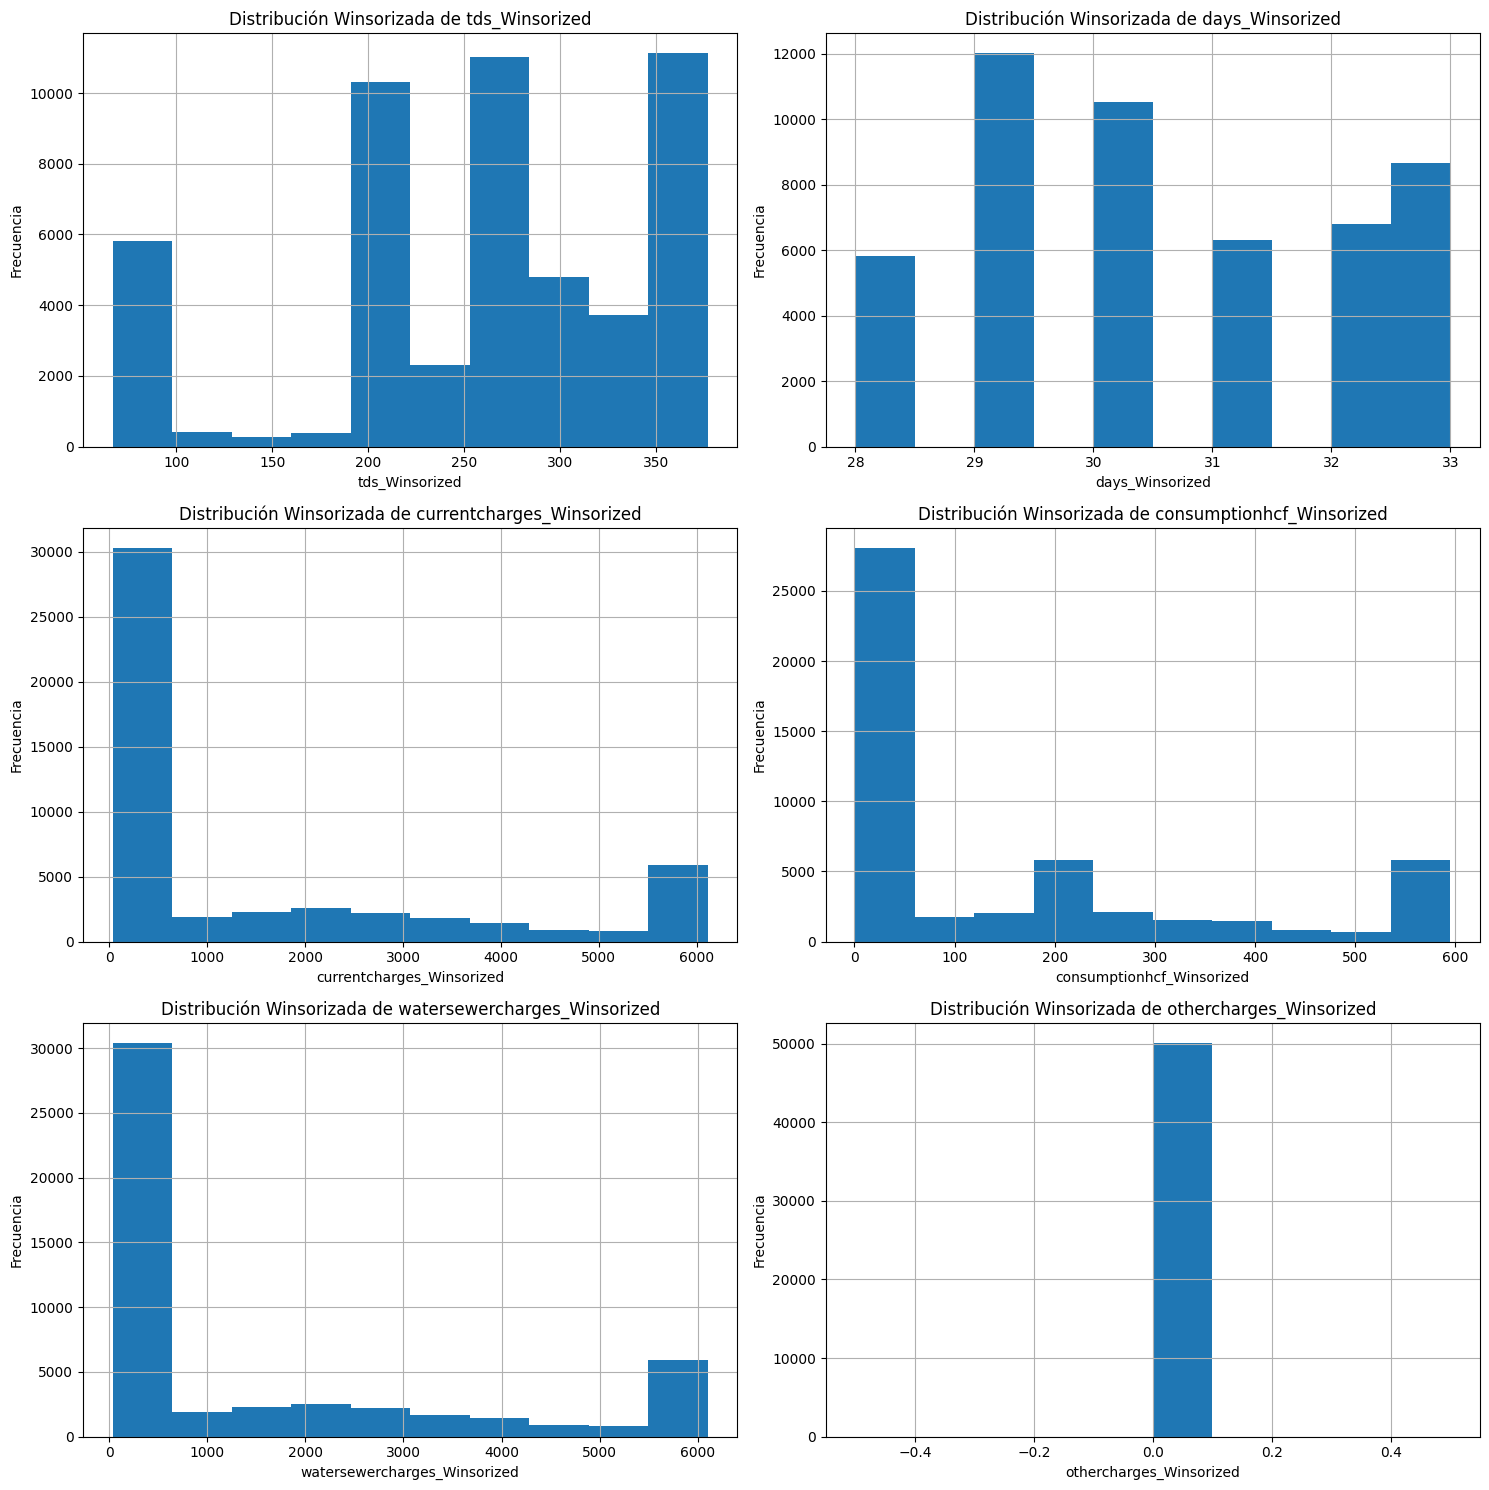

In [513]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.ravel()

winsorized_columnas = ['tds_Winsorized', 'days_Winsorized', 'currentcharges_Winsorized',
                      'consumptionhcf_Winsorized', 'watersewercharges_Winsorized', 'othercharges_Winsorized']

for i, col in enumerate(winsorized_columnas):
    try:
        df[col].hist(ax=axes[i])
        axes[i].set_title(f'Distribución Winsorizada de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
    except Exception as e:
        axes[i].set_title(f"Error al trazar {col}: {e}")

plt.tight_layout()
plt.show()


# **5. Análisis Descriptivo de Datos**

Después de haber completado el proceso de limpieza y transformación, se llevó a cabo un análisis a profundidad del conjunto de datos. En esta primera fase se realizó un Análisis Descriptivo, el cual tuvo como objetivo comprender la estructura y las características de la información recopilada.

Este análisis permitió explorar propiedades de los datos y responder preguntas como:

*   ¿Cuántas observaciones y variables existen?
*   ¿Cuales son los tipos de datos de las variables?
*   ¿Se encuentran valores nulos?
*   ¿Cuáles son la media, mediana, moda, rango, varianza y desviación estándar de las variables de tipo númerica?
*   ¿Cómo se distribuyen los valores en cada una de las variables?
*   ¿Existe alguna relación entre las variables?





En primera instancia, se obtuvó un resumen general de los datos descartando las columnas creadas de la Winsorización:

In [514]:
df.drop(columns=['tds_Winsorized', 'days_Winsorized', 'currentcharges_Winsorized', 'consumptionhcf_Winsorized', 'watersewercharges_Winsorized', 'othercharges_Winsorized'], inplace=True)
df.describe(include='all')

developmentname borough  \
count                              50155   50155   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4807   23409   
mean                                 NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   
std                                  NaN     NaN   

                             accountname location           tds   rccode  \
count                              50155    50155  50155.000000    50155   
unique                               117      305           NaN      114   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01           NaN  Q026000   
freq                                4741     5259           NaN     4747   
mean                                 NaN      NaN    258.691437      NaN   
min                                  NaN      NaN      1.000000      NaN   
25%                                  NaN      NaN    209.000000      NaN   
50%                                  NaN      NaN    273.000000      NaN   
75%                                  NaN      NaN    338.000000      NaN   
max                                  NaN      NaN    559.000000      NaN   
std                                  NaN      NaN    101.519212      NaN   

          umisbillid                   revenuemonth  \
count   5.015500e+04                          50155   
unique           NaN                            NaN   
top              NaN                            NaN   
freq             NaN                            NaN   
mean    6.584326e+06  2017-10-12 22:50:13.936795904   
min     2.576038e+06            2013-01-01 00:00:00   
25%     4.132341e+06            2015-04-01 00:00:00   
50%     6.353682e+06            2017-11-01 00:00:00   
75%     8.562616e+06            2020-01-01 00:00:00   
max     1.217584e+07            2023-01-01 00:00:00   
std     2.661534e+06                            NaN   

                     servicestartdate                 serviceenddate  \
count                           50148                          50148   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-10-01 04:17:48.198133504  2017-11-03 08:43:21.579325184   
min               2002-12-22 00:00:00            2013-01-14 00:00:00   
25%               2015-03-22 00:00:00            2015-04-21 00:00:00   
50%               2017-10-22 00:00:00            2017-11-23 00:00:00   
75%               2019-12-23 00:00:00            2020-01-26 00:00:00   
max               2022-12-29 00:00:00            2023-01-27 00:00:00   
std                               NaN                            NaN   

                days meternumber  currentcharges              rateclass  \
count   50155.000000       50155    50155.000000                  50155   
unique           NaN         794             NaN                      5   
top              NaN  UN-METERED             NaN  BASIC WATER AND SEWER   
freq             NaN         179             NaN                  50051   
mean       33.201595         NaN     2143.459285                    NaN   
min         0.000000         NaN        0.000000                    NaN   
25%        29.000000         NaN       46.460000                    NaN   
50%        30.000000         NaN      197.360000                    NaN   
75%        32.000000         NaN     2595.260000                    NaN   
max      6968.000000         NaN   392036.460000                    NaN   
std        53.115153         NaN     5600.139052                    NaN   

        consumptionhcf  watersewercharges  othercharges  
co

Posterior al resumen, se obtuvó el número de observaciones y variables, dando respuesta a la incógnita de cuantas observaciones y variables existen en el dataframe:

In [515]:
print(f"Observaciones: {df.shape[0]}, Variables: {df.shape[1]}")

Observaciones: 50155, Variables: 17


Después, se dio respuesta a la pregunta de los tipos de datos en las variables:

In [516]:
df.dtypes

developmentname            category
borough                    category
accountname                category
location                     object
tds                           int64
rccode                     category
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                          int64
meternumber                category
currentcharges              float64
rateclass                  category
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Como se puede ver en los resultados, los tipos de datos son diversos y la mayoría son de tipo Categórico. A continuación, se muestra un conteo de los valores nulos, dando respuesta a sí existen valores nulos en cada una de las variables:

In [517]:
df.isnull().sum()

developmentname      0
borough              0
accountname          0
location             0
tds                  0
rccode               0
umisbillid           0
revenuemonth         0
servicestartdate     7
serviceenddate       7
days                 0
meternumber          0
currentcharges       0
rateclass            0
consumptionhcf       0
watersewercharges    0
othercharges         0
dtype: int64

En base a los resultados obtenidos, se puede observar que no existen valores nulos en las variables. En el caso de las columnas servicestartdate y serviceenddate, indica que hay valores nulos debido a que fueron reemplazados por NAT. A continuación, se muestran la media, mediana, moda, rango, varianza y desviación estándar de las variables tipo númerica:

In [518]:
numeros= ['tds', 'umisbillid', 'days', 'currentcharges', 'consumptionhcf', 'watersewercharges', 'othercharges']

for col in numeros:
    print(f"Estadística descriptiva para {col}:")
    print(f"  Median: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}")
    print(f"  Rango: {df[col].max() - df[col].min()}")
    print(f"  Varianza: {df[col].var()}")
    print(f"  Desviación Estándar: {df[col].std()}")
    print("\n")

Estadística descriptiva para tds:
  Median: 258.69143654670523
  Mediana: 273.0
  Moda: 260
  Rango: 558
  Varianza: 10306.15046999207
  Desviación Estándar: 101.51921231960023


Estadística descriptiva para umisbillid:
  Median: 6584326.121423587
  Mediana: 6353682.0
  Moda: 7495245
  Rango: 9599802
  Varianza: 7083764442085.193
  Desviación Estándar: 2661534.2271113466


Estadística descriptiva para days:
  Median: 33.20159505532848
  Mediana: 30.0
  Moda: 29
  Rango: 6968
  Varianza: 2821.219497395872
  Desviación Estándar: 53.1151531805743


Estadística descriptiva para currentcharges:
  Median: 2143.4592846176856
  Mediana: 197.36
  Moda: 38.07
  Rango: 392036.46
  Varianza: 31361557.4035289
  Desviación Estándar: 5600.139052160124


Estadística descriptiva para consumptionhcf:
  Median: 223.79886352307847
  Mediana: 26.0
  Moda: 0
  Rango: 434200
  Varianza: 4094239.027453892
  Desviación Estándar: 2023.4226022889761


Estadística descriptiva para watersewercharges:
  Median: 212

En base a los resultados, se puede observar que los datos tiene una gran variabilidad, en algunas variables la varianza y desviación estándar sin embargo no quiere decir que los datos sean atípicos y en otras la moda y mediana es 0 pero se debe a que en esas variables la mayoría de los datos son 0 y no nulos.

A continuación, se muestra la distribución en cada una de las variables:

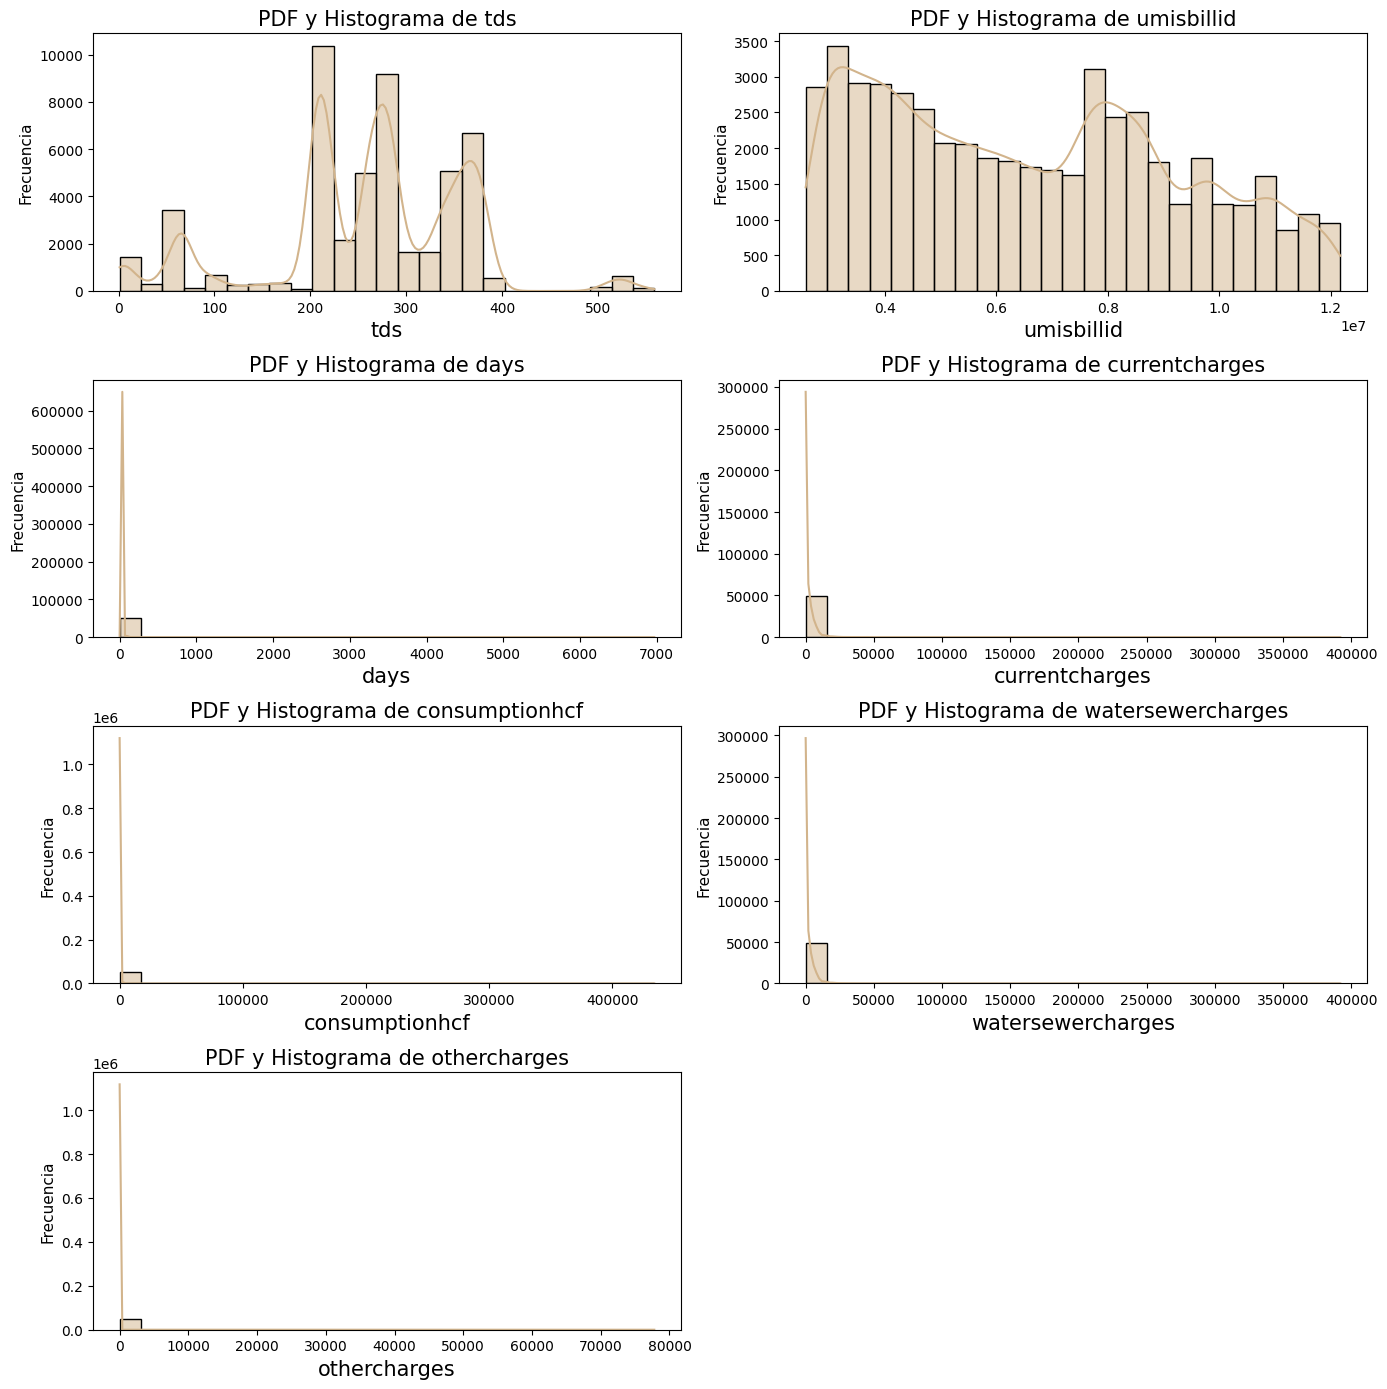

In [519]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='tan')
    plt.title(f'PDF y Histograma de {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

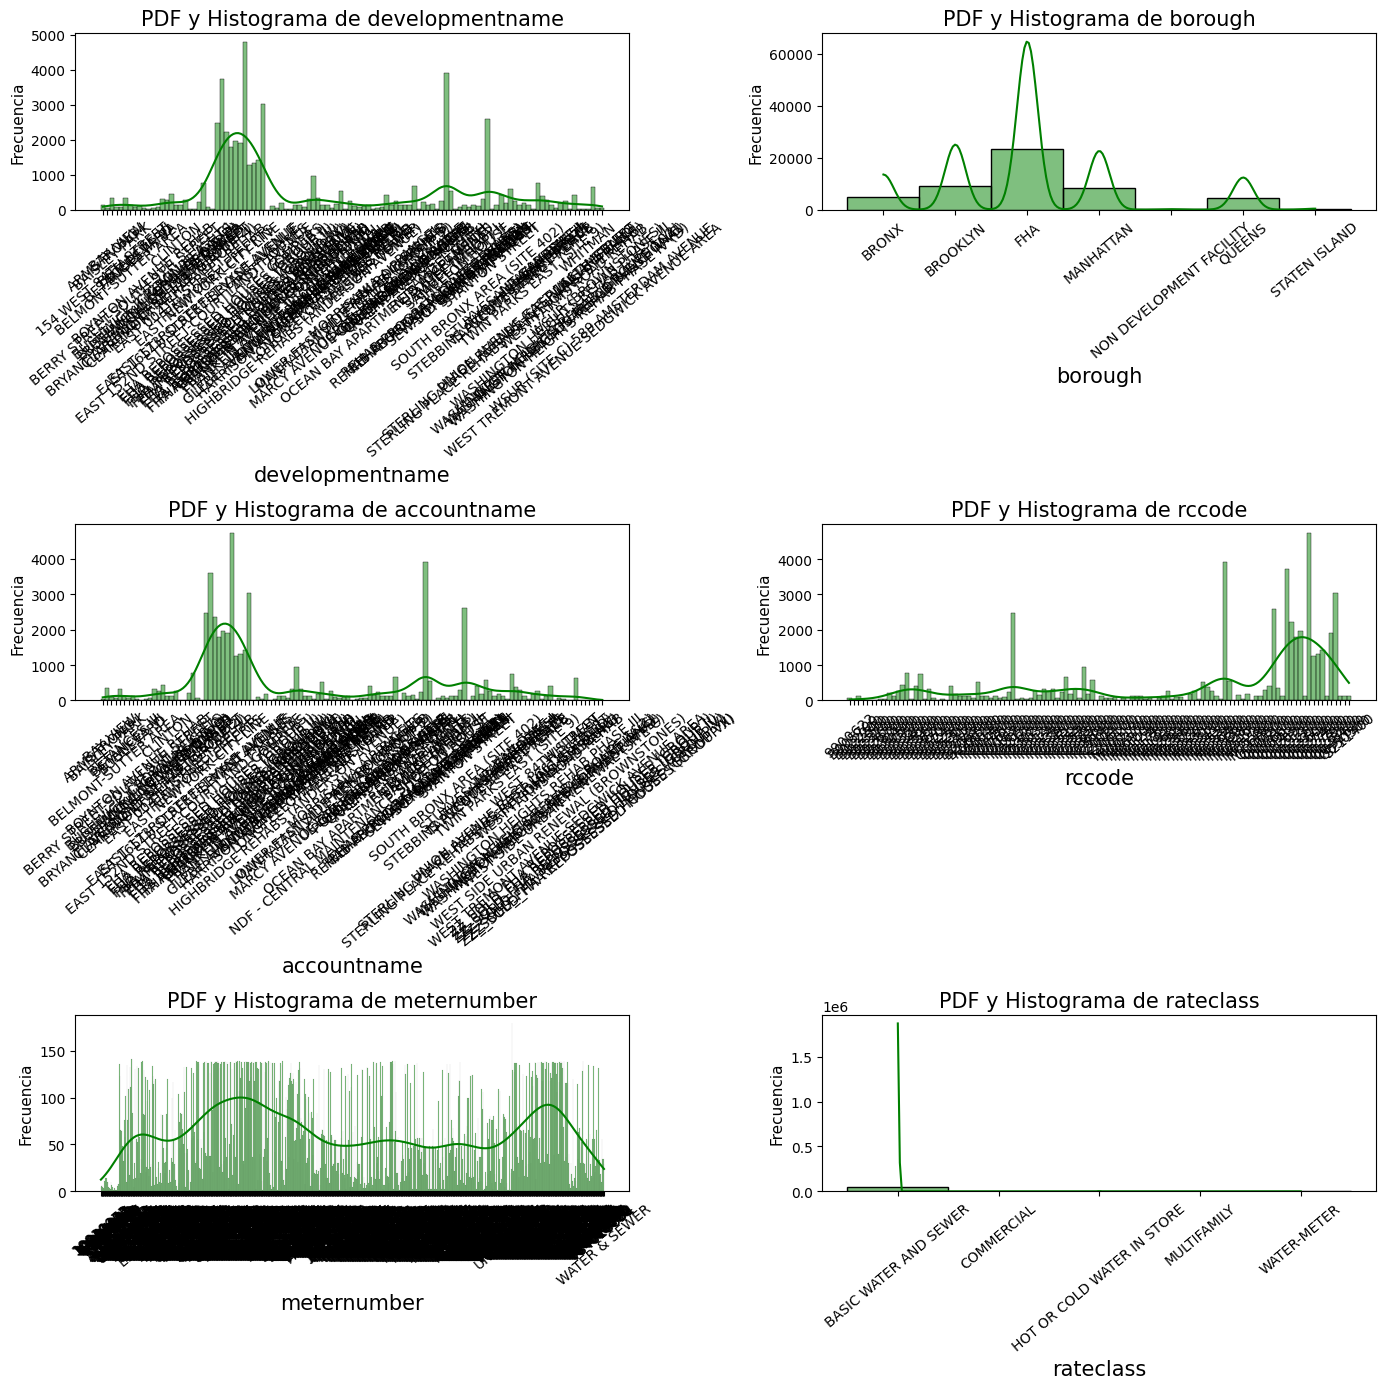

In [520]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include='category').columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='green')
    plt.title(f'PDF y Histograma de {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.xticks(rotation=40)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

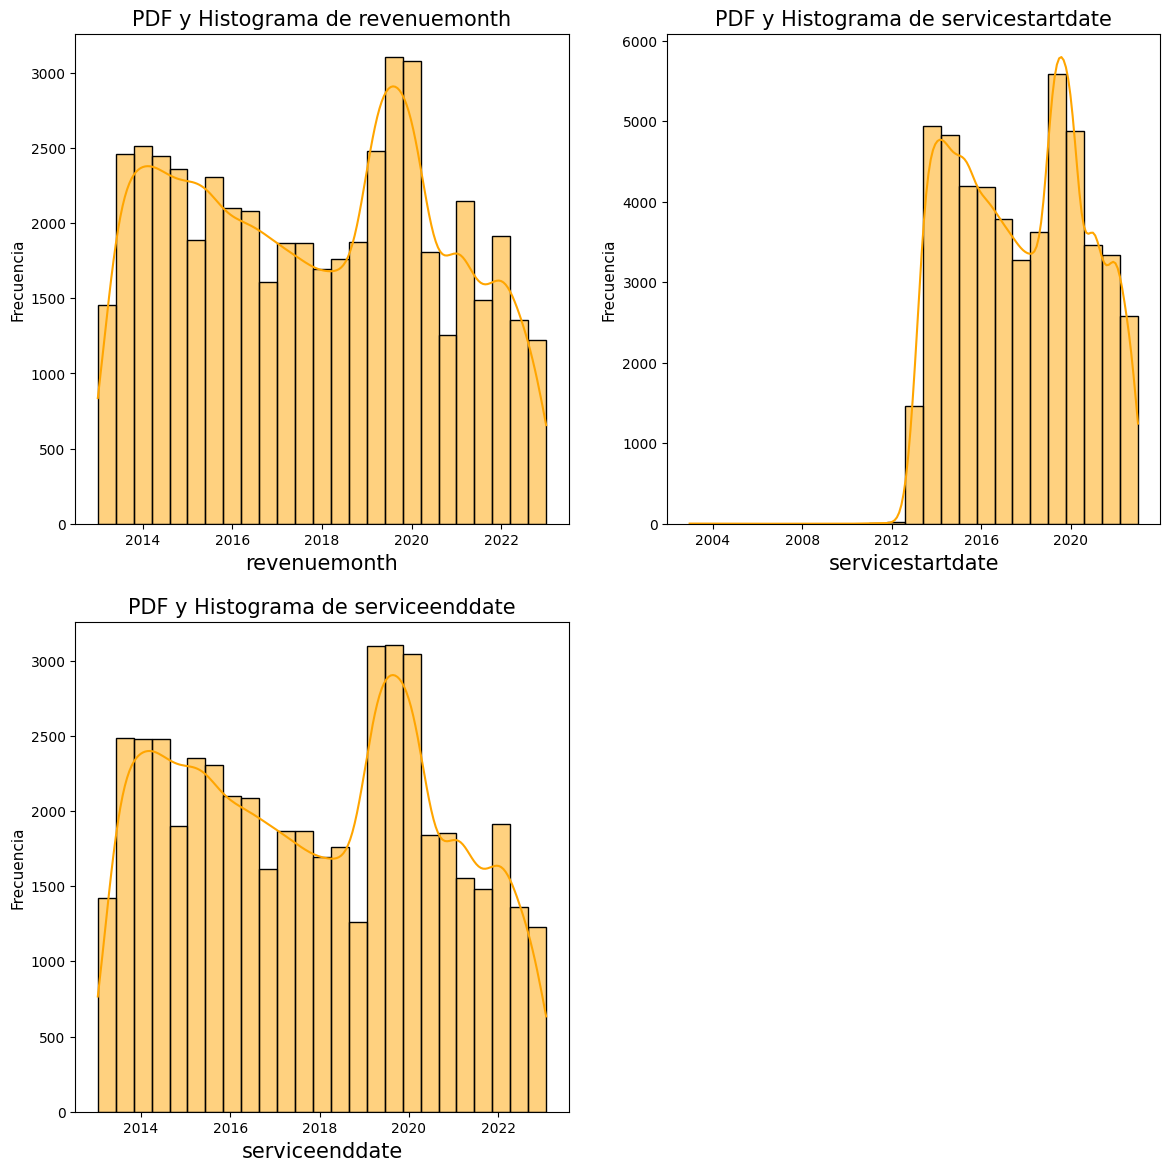

In [521]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include='datetime').columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='orange')
    plt.title(f'PDF y Histograma de {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Frecuencia', fontsize=11)

En base a los resultados, se puede deducir que hay gran distribución sobre todo en las variables de tipo categórico y fecha. Para el caso de las variables de tipo númerica la distribución esta inclinada hacia la izquierda.

Por últmo, se muestra la posible relación entre las variables de tipo númerica:

In [522]:
matriz_correlacion = df.select_dtypes(include=np.number).corr()

matriz_correlacion

tds  umisbillid      days  currentcharges  \
tds                1.000000   -0.045357  0.005071        0.053589   
umisbillid        -0.045357    1.000000 -0.012485        0.010836   
days               0.005071   -0.012485  1.000000        0.220329   
currentcharges     0.053589    0.010836  0.220329        1.000000   
consumptionhcf     0.013006   -0.001811  0.049919        0.265471   
watersewercharges  0.054778    0.007736  0.218455        0.996340   
othercharges      -0.009147    0.036895  0.040841        0.129184   

                   consumptionhcf  watersewercharges  othercharges  
tds                      0.013006           0.054778     -0.009147  
umisbillid              -0.001811           0.007736      0.036895  
days                     0.049919           0.218455      0.040841  
currentcharges           0.265471           0.996340      0.129184  
consumptionhcf           1.000000           0.267520     -0.000738  
watersewercharges        0.267520           1.000000      0.043949  
othercharges            -0.000738           0.043949      1.000000

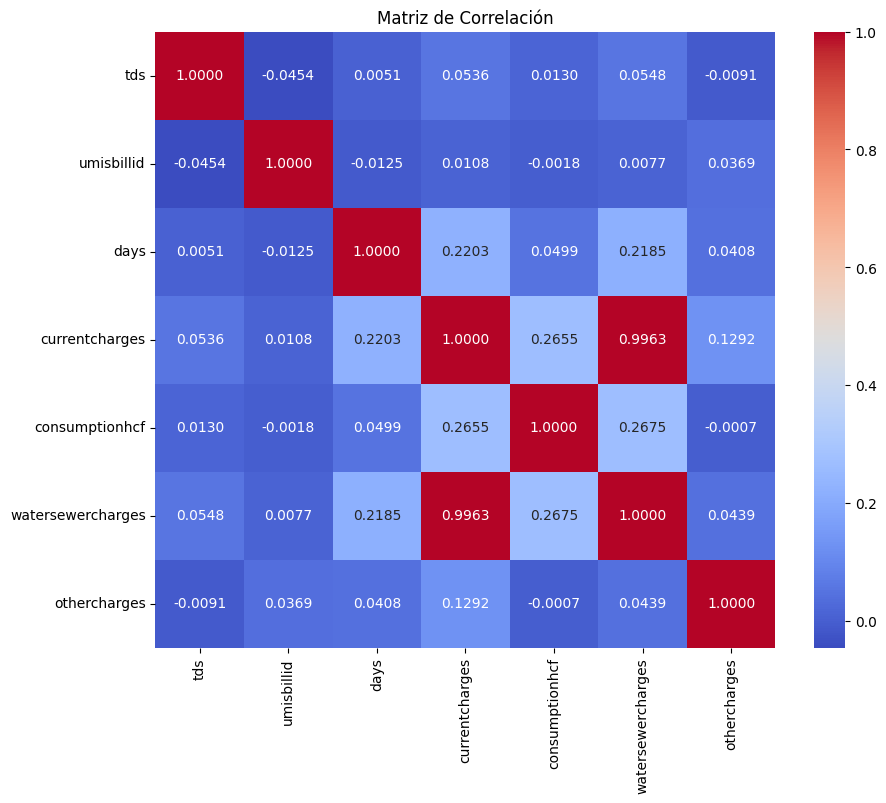

In [523]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Matriz de Correlación')
plt.show()

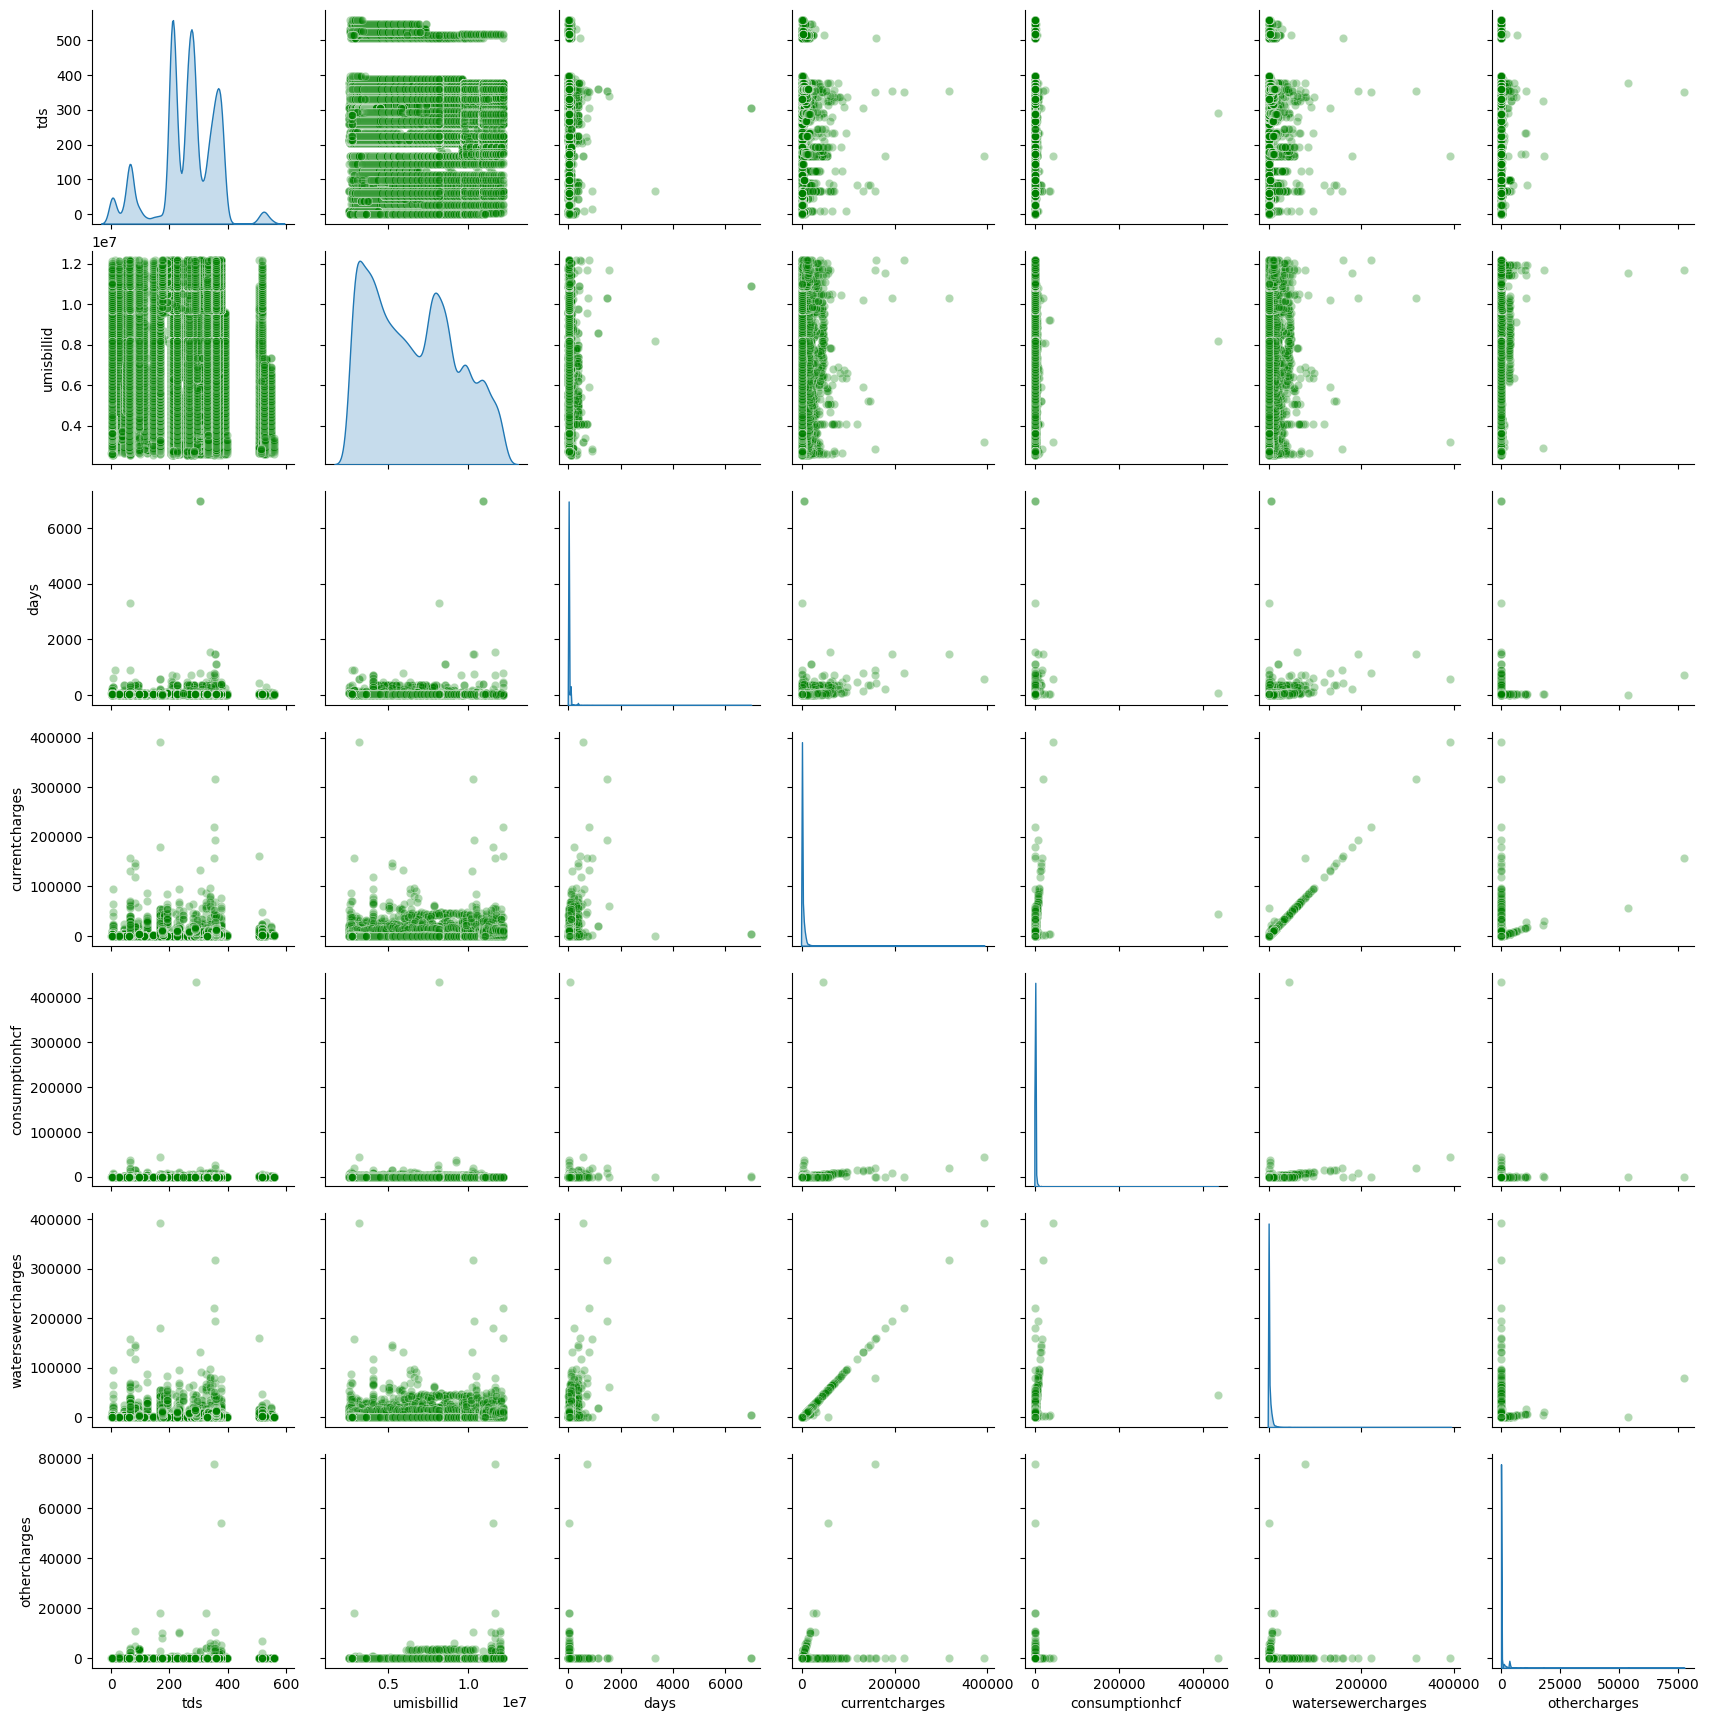

In [524]:
columnas_numericas = df.select_dtypes(include=[np.number])
sns.pairplot(columnas_numericas, plot_kws={'alpha': 0.3, 'color': 'green'}, diag_kind='kde')
plt.show()

# **6. Análisis Exploratorio de los Datos**

###**Consumo**

**¿Cuál es el consumo promedio de agua por mes?**

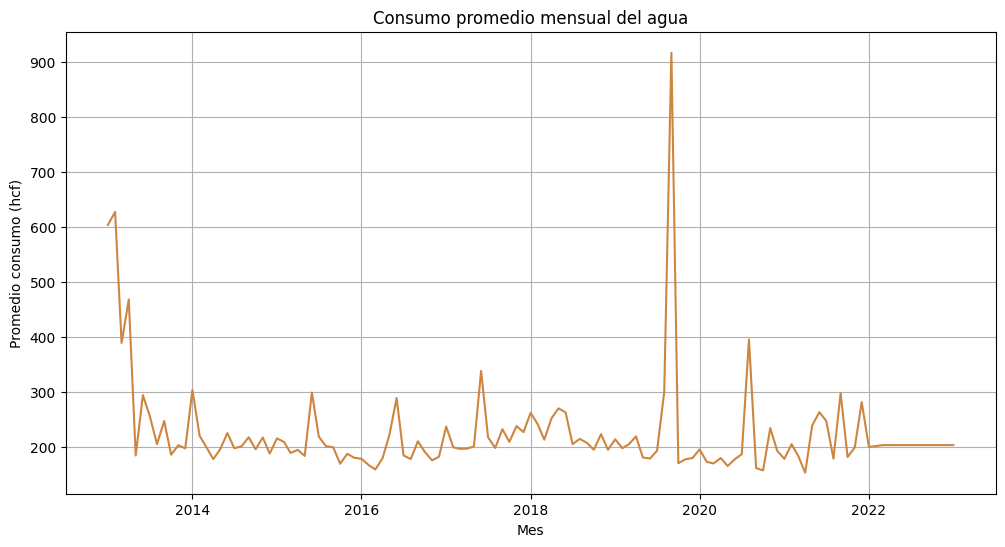

In [525]:
promedio = df.groupby('revenuemonth')['consumptionhcf'].mean()

plt.figure(figsize=(12, 6))
plt.plot(promedio.index, promedio.values, color='peru', )
plt.xlabel('Mes')
plt.ylabel('Promedio consumo (hcf)')
plt.title('Consumo promedio mensual del agua')
plt.grid(True)
plt.show()

**¿Cómo ha variado el consumo de agua a lo largo del tiempo?**

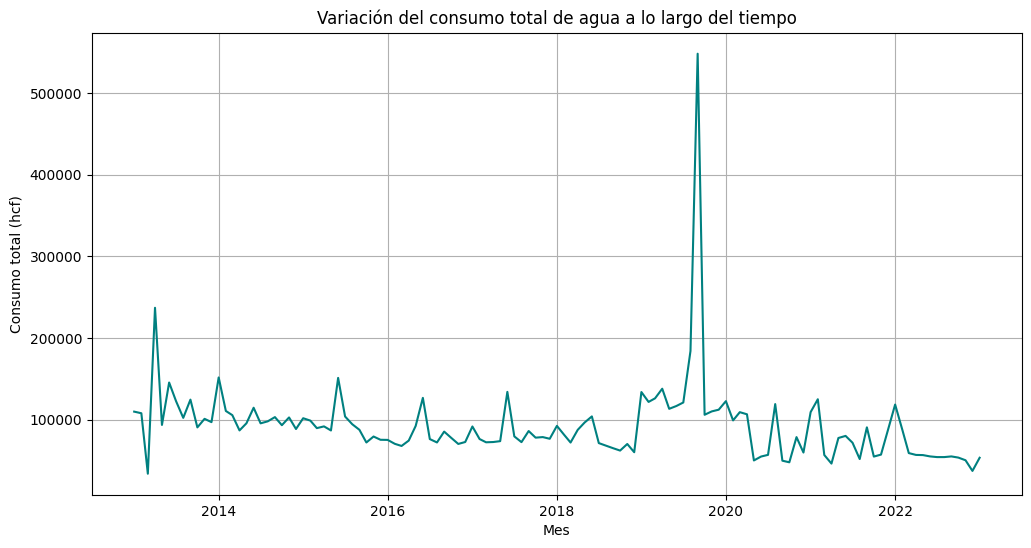

In [526]:
consumomes = df.groupby('revenuemonth')['consumptionhcf'].sum()

plt.figure(figsize=(12, 6))
plt.plot(consumomes.index, consumomes.values, color='teal')
plt.xlabel('Mes')
plt.ylabel('Consumo total (hcf)')
plt.title('Variación del consumo total de agua a lo largo del tiempo')
plt.grid(True)
plt.show()

**¿Qué porcentaje del consumo total de agua corresponde a cada categoría de usuarios?**

<ipython-input-527-f20991dd799b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumocategoria = df.groupby('rateclass')['consumptionhcf'].sum()


rateclass
BASIC WATER AND SEWER         99.989808
COMMERCIAL                     0.000000
HOT OR COLD WATER IN STORE     0.000000
MULTIFAMILY                    0.000000
WATER-METER                    0.010192
Name: consumptionhcf, dtype: float64


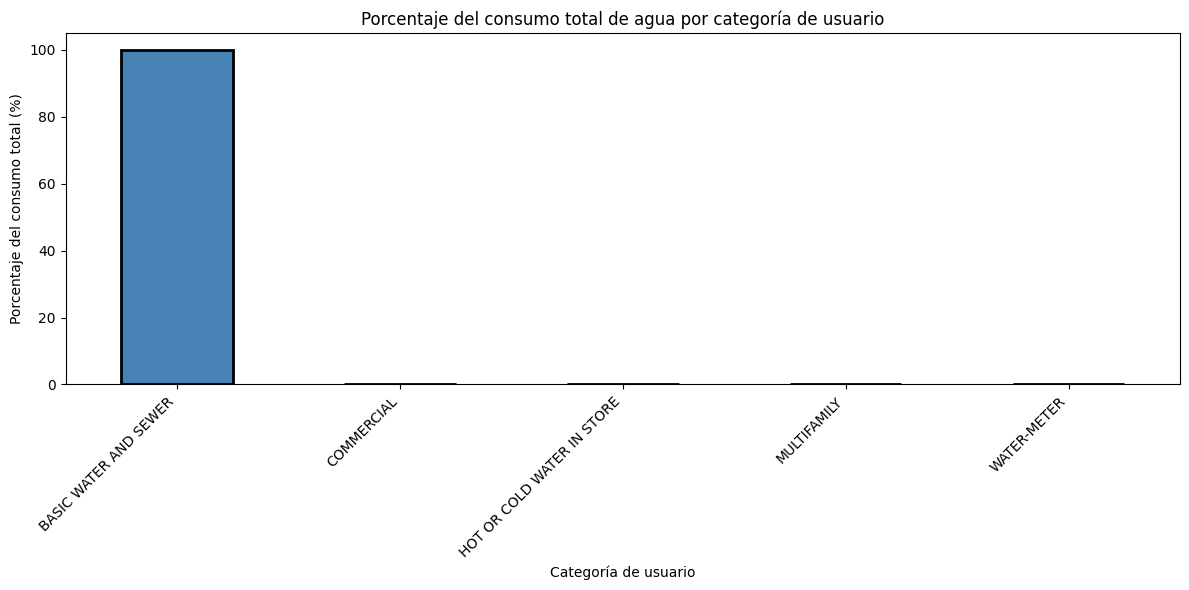

In [527]:
consumototal= df['consumptionhcf'].sum()

consumocategoria = df.groupby('rateclass')['consumptionhcf'].sum()

percentage_consumption = (consumocategoria/ consumototal) * 100

print(percentage_consumption)

plt.figure(figsize=(12, 6))
percentage_consumption.plot(kind='bar', color='steelblue', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel('Categoría de usuario')
plt.ylabel('Porcentaje del consumo total (%)')
plt.title('Porcentaje del consumo total de agua por categoría de usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**¿Cuál es el consumo de agua por desarrollo?**

<ipython-input-528-be1113d89eb5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumodesarrollo = df.groupby('developmentname')['consumptionhcf'].sum()


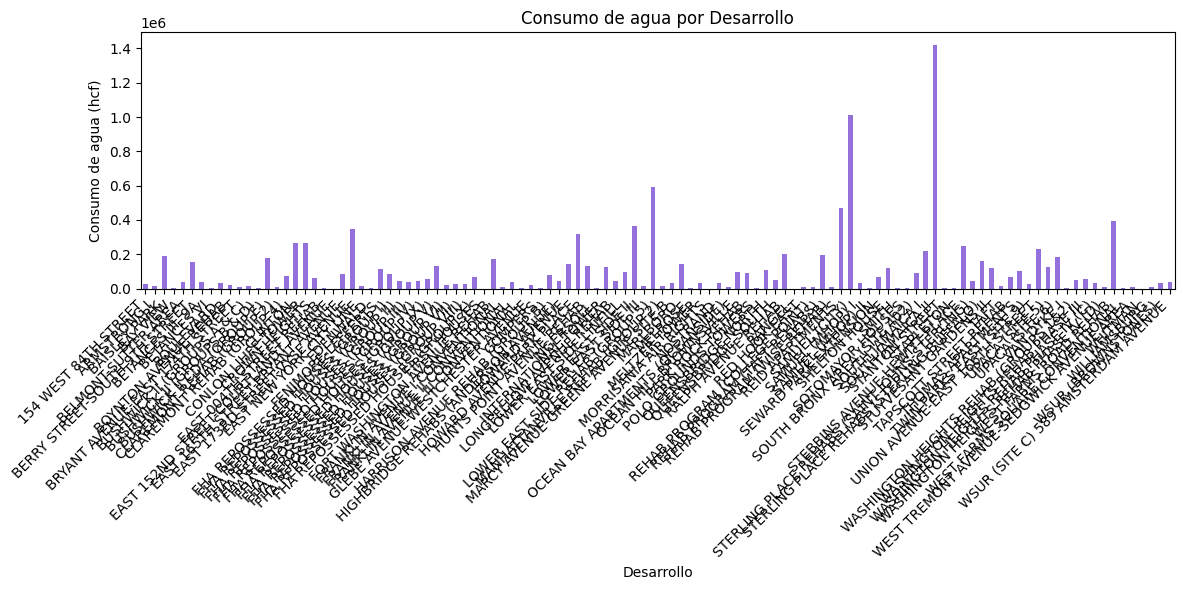

In [528]:
consumodesarrollo = df.groupby('developmentname')['consumptionhcf'].sum()

plt.figure(figsize=(12, 6))
consumodesarrollo.plot(kind='bar', color='mediumpurple')
plt.xlabel('Desarrollo')
plt.ylabel('Consumo de agua (hcf)')
plt.title('Consumo de agua por Desarrollo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**¿Cuál es el consumo de agua por municipio?**

<ipython-input-529-09c1ed36aa39>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumodistrito = df.groupby('borough')['consumptionhcf'].sum()


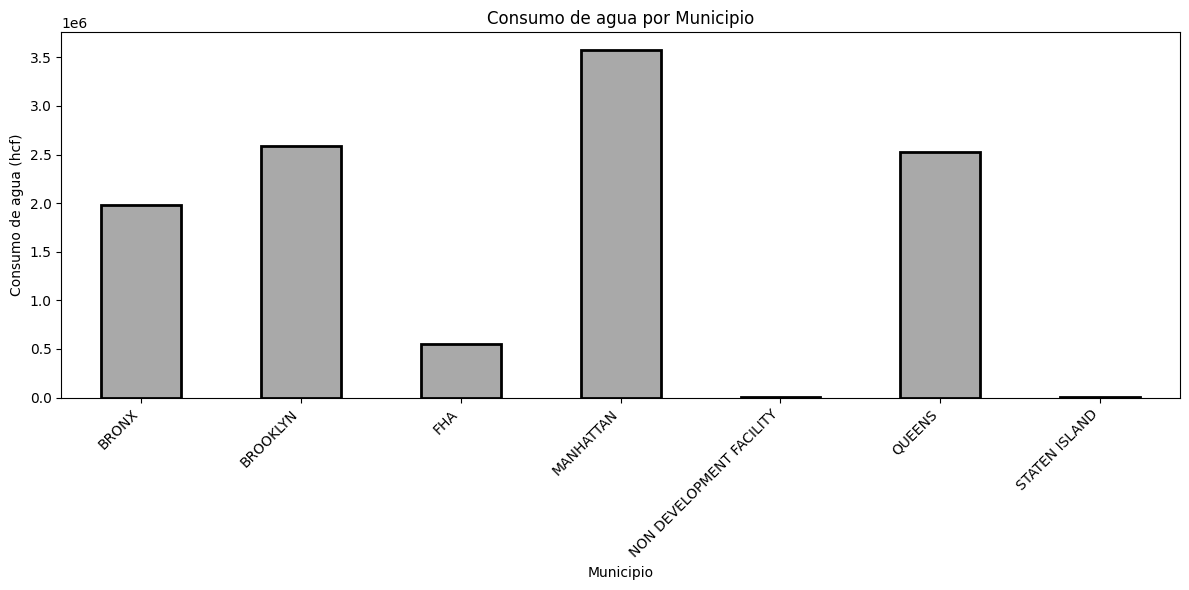

In [529]:
consumodistrito = df.groupby('borough')['consumptionhcf'].sum()

plt.figure(figsize=(12, 6))
consumodistrito.plot(kind='bar', color='darkgrey', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel('Municipio')
plt.ylabel('Consumo de agua (hcf)')
plt.title('Consumo de agua por Municipio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Costo**

**¿Cuál es el costo promedio del agua por mes?**

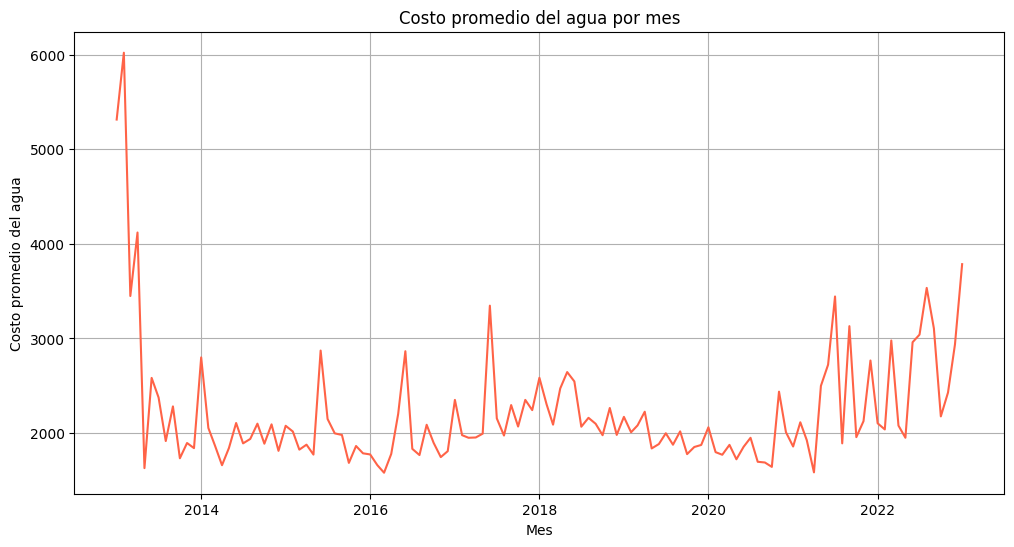

In [530]:
import matplotlib.pyplot as plt
promedio_costo = df.groupby('revenuemonth')['currentcharges'].mean()

plt.figure(figsize=(12, 6))
plt.plot(promedio_costo.index, promedio_costo.values, color='tomato')
plt.xlabel('Mes')
plt.ylabel('Costo promedio del agua')
plt.title('Costo promedio del agua por mes')
plt.grid(True)
plt.show()

**¿Cómo ha variado el costo del agua a lo largo del tiempo?**

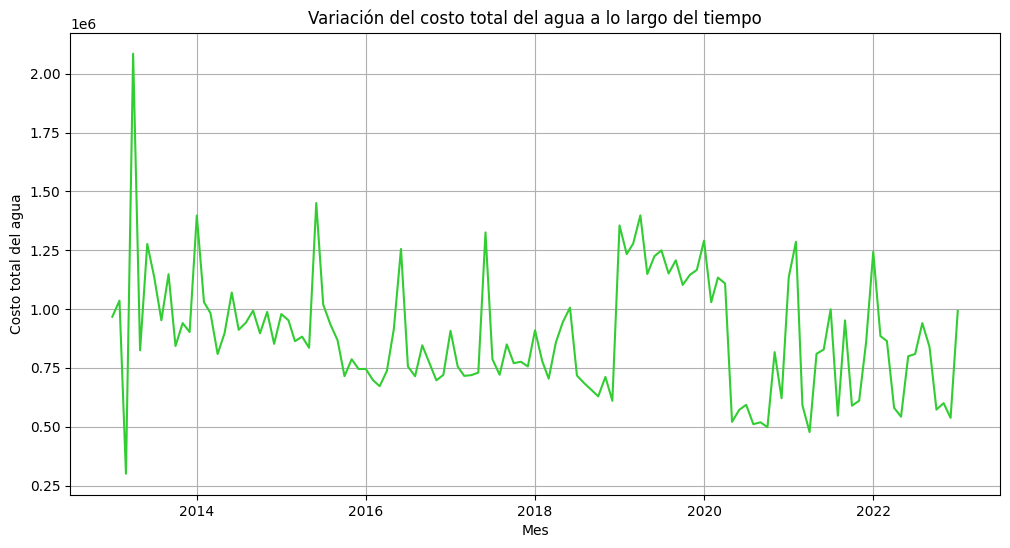

In [531]:
costo_mes = df.groupby('revenuemonth')['currentcharges'].sum()

plt.figure(figsize=(12, 6))
plt.plot(costo_mes.index, costo_mes.values, color='limegreen')
plt.xlabel('Mes')
plt.ylabel('Costo total del agua')
plt.title('Variación del costo total del agua a lo largo del tiempo')
plt.grid(True)
plt.show()

**¿Qué porcentaje del costo total del agua corresponde a cada categoría de usuario?**

rateclass
BASIC WATER AND SEWER         99.950396
COMMERCIAL                     0.000535
HOT OR COLD WATER IN STORE     0.002715
MULTIFAMILY                    0.036487
WATER-METER                    0.009867
Name: currentcharges, dtype: float64


<ipython-input-532-01535f6d8b4f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_categoria = df.groupby('rateclass')['currentcharges'].sum()


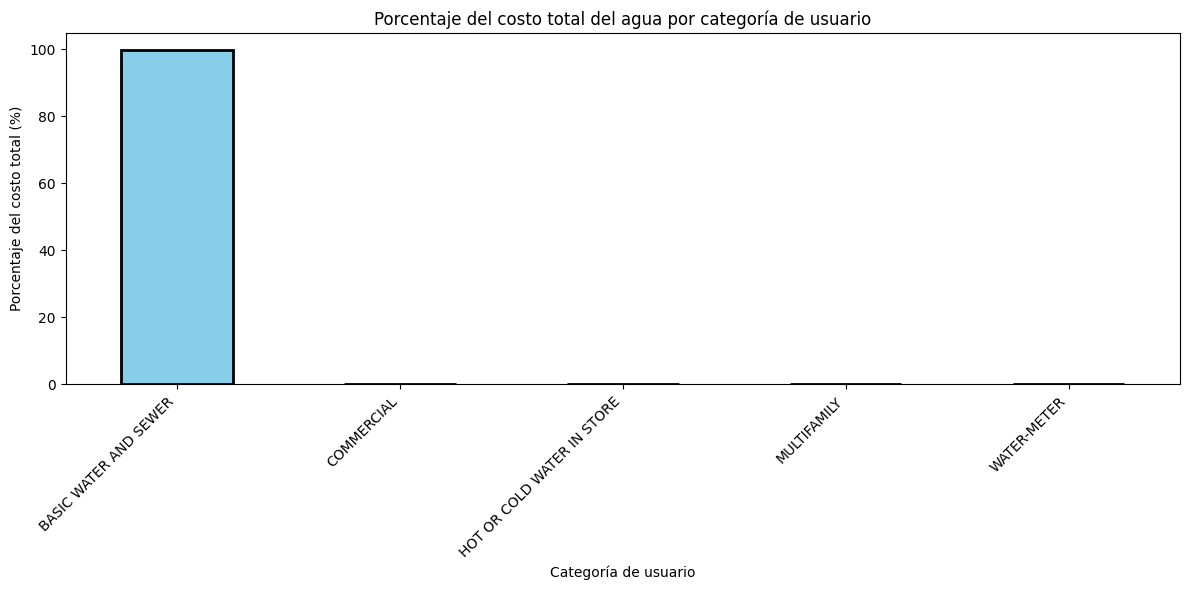

In [532]:
costo_total = df['currentcharges'].sum()
costo_categoria = df.groupby('rateclass')['currentcharges'].sum()
porcentaje_costo = (costo_categoria / costo_total) * 100
print(porcentaje_costo)

plt.figure(figsize=(12, 6))
porcentaje_costo.plot(kind='bar', color='skyblue', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel('Categoría de usuario')
plt.ylabel('Porcentaje del costo total (%)')
plt.title('Porcentaje del costo total del agua por categoría de usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**¿Cuál es el costo total por desarrollo?**

<ipython-input-533-a3d5b906e1a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_desarrollo = df.groupby('developmentname')['currentcharges'].sum()


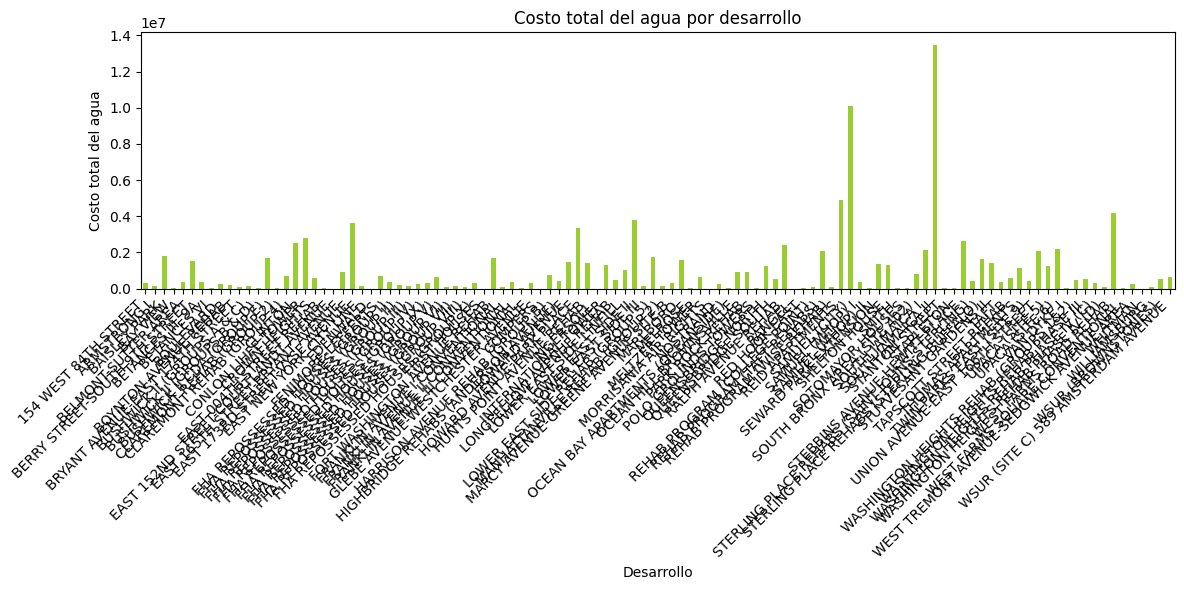

In [533]:
costo_desarrollo = df.groupby('developmentname')['currentcharges'].sum()

plt.figure(figsize=(12, 6))
costo_desarrollo.plot(kind='bar', color='yellowgreen')
plt.xlabel('Desarrollo')
plt.ylabel('Costo total del agua')
plt.title('Costo total del agua por desarrollo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**¿Cuál es el costo total por municipio?**

<ipython-input-534-4f36078e1c6b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_municipio = df.groupby('borough')['currentcharges'].sum()


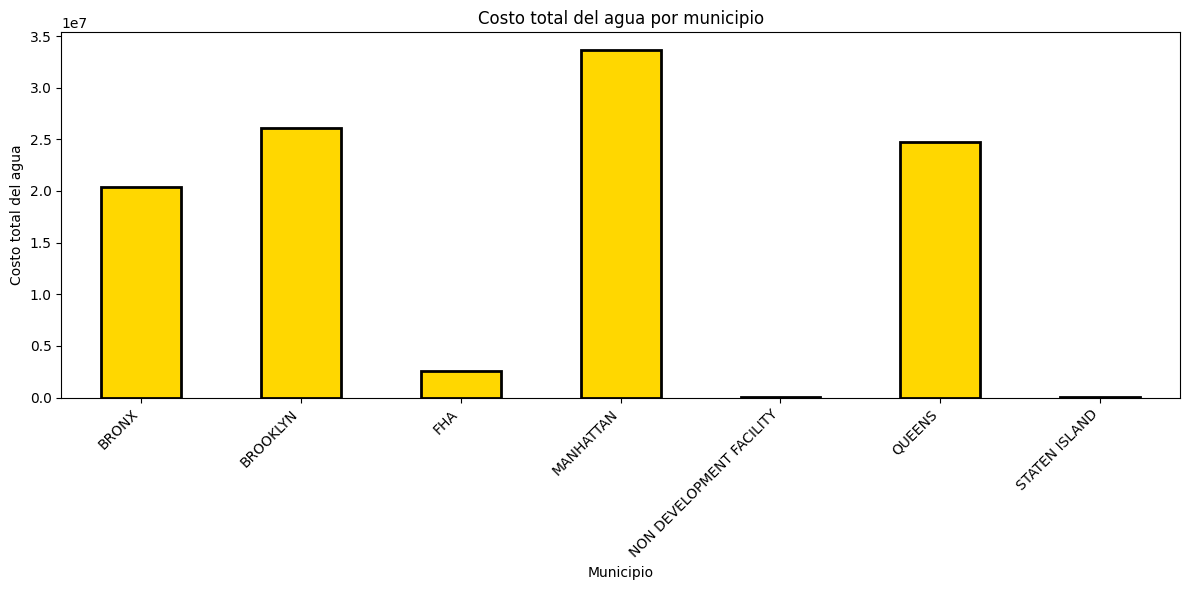

In [534]:
costo_municipio = df.groupby('borough')['currentcharges'].sum()

plt.figure(figsize=(12, 6))
costo_municipio.plot(kind='bar', color='gold', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel('Municipio')
plt.ylabel('Costo total del agua')
plt.title('Costo total del agua por municipio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Relación entre el Consumo y Costo**


**¿Existe alguna relación entre el consumo y el costo del agua?**

La correlación entre el consumo y el costo del agua es: 0.2654714205912083


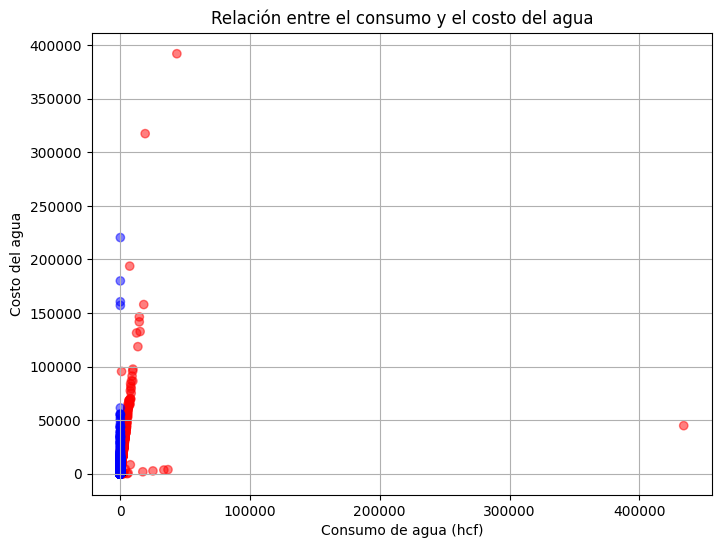

In [535]:
correlation = df['consumptionhcf'].corr(df['currentcharges'])
print(f"La correlación entre el consumo y el costo del agua es: {correlation}")

colores = ['red' if i else 'blue' for i in df['consumptionhcf'] > df['consumptionhcf'].mean()]
plt.figure(figsize=(8, 6))
plt.scatter(df['consumptionhcf'], df['currentcharges'], alpha=0.5, c=colores)
plt.xlabel('Consumo de agua (hcf)')
plt.ylabel('Costo del agua')
plt.title('Relación entre el consumo y el costo del agua')
plt.grid(True)
plt.show()

**¿Se observan valores atípicos?**

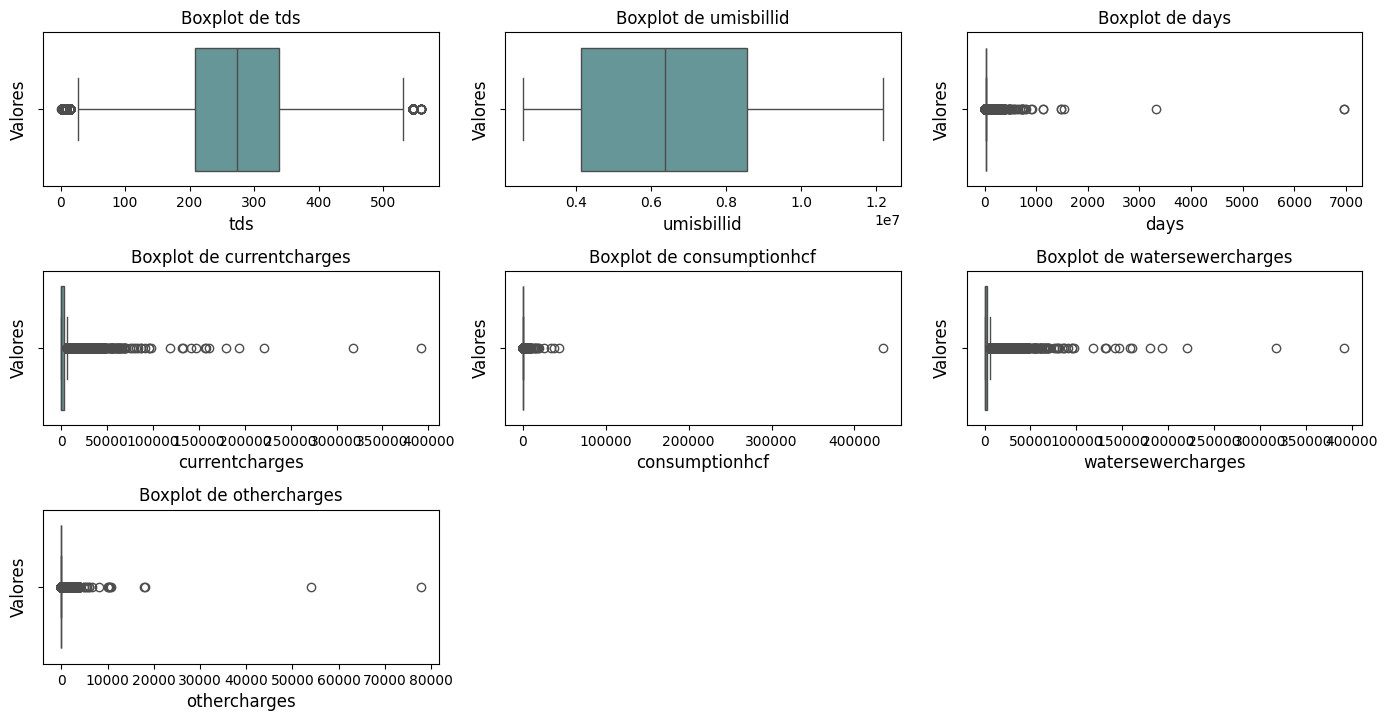

In [536]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14, 14))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col].dropna(), color='cadetblue')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Valores', fontsize=12)
plt.tight_layout()
plt.show()

In [537]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

In [538]:
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="brown")
    plt.title(f"Distribución de {column_name}")

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

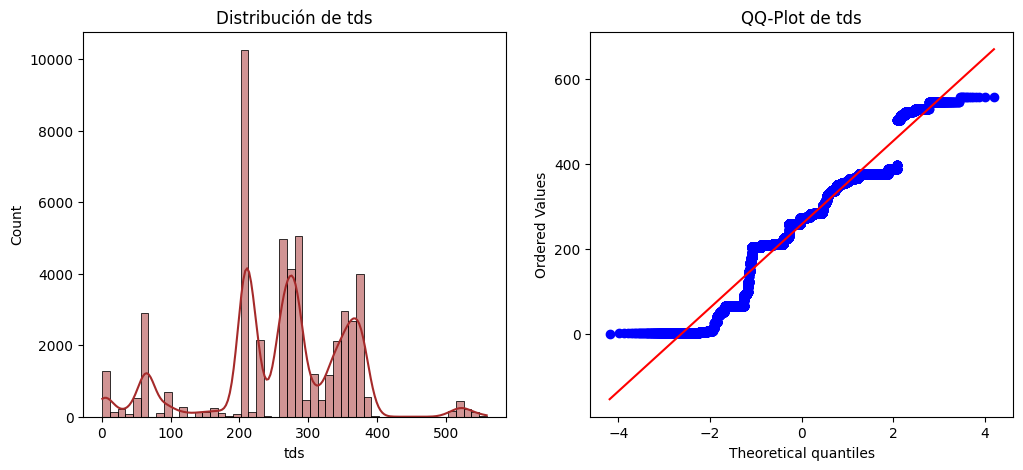


Pruebas de normalidad para la columna: tds
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 1077.70370
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


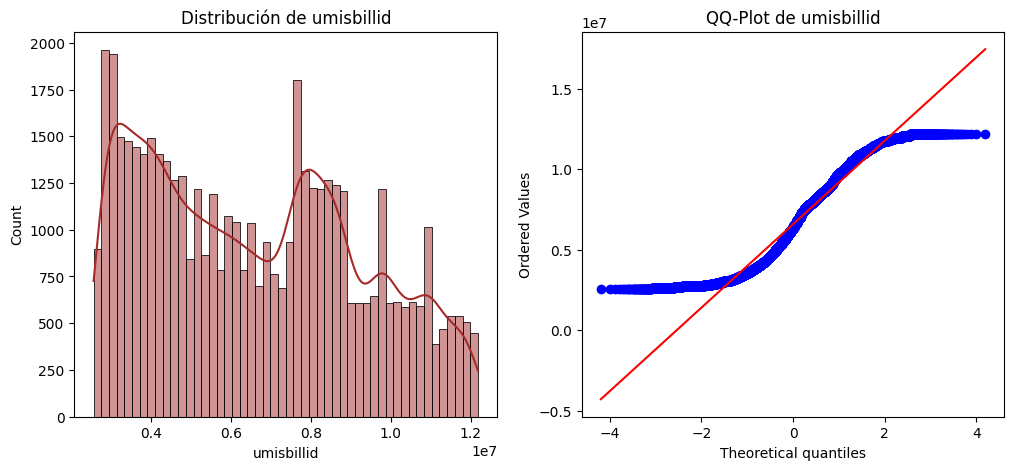


Pruebas de normalidad para la columna: umisbillid
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 700.68126
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


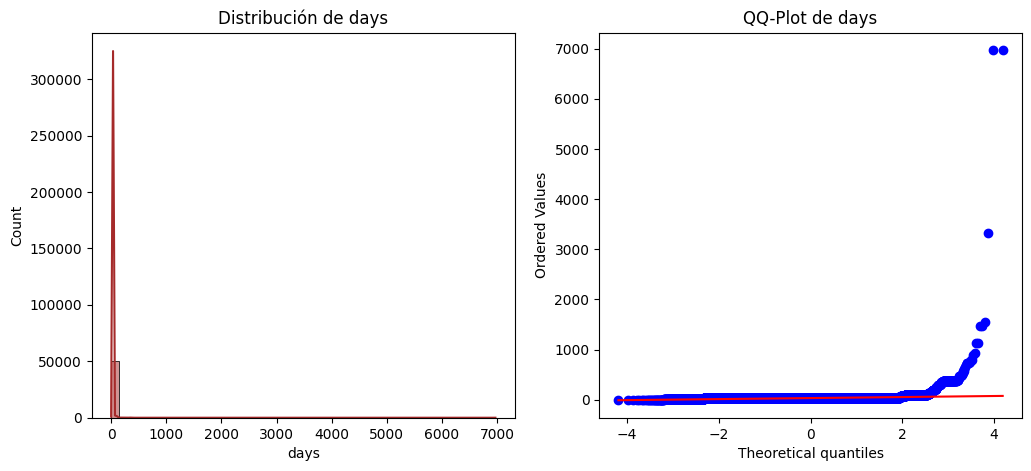


Pruebas de normalidad para la columna: days
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 16429.24168
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


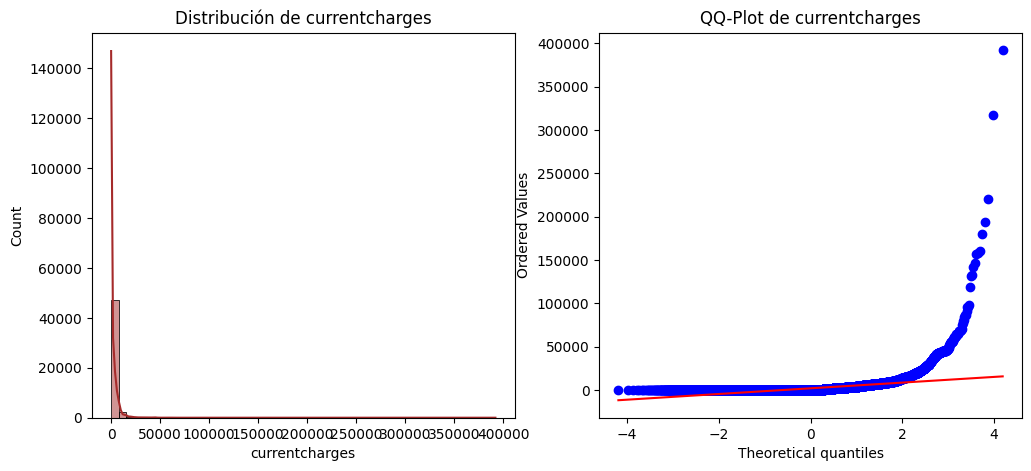


Pruebas de normalidad para la columna: currentcharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 8113.05386
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


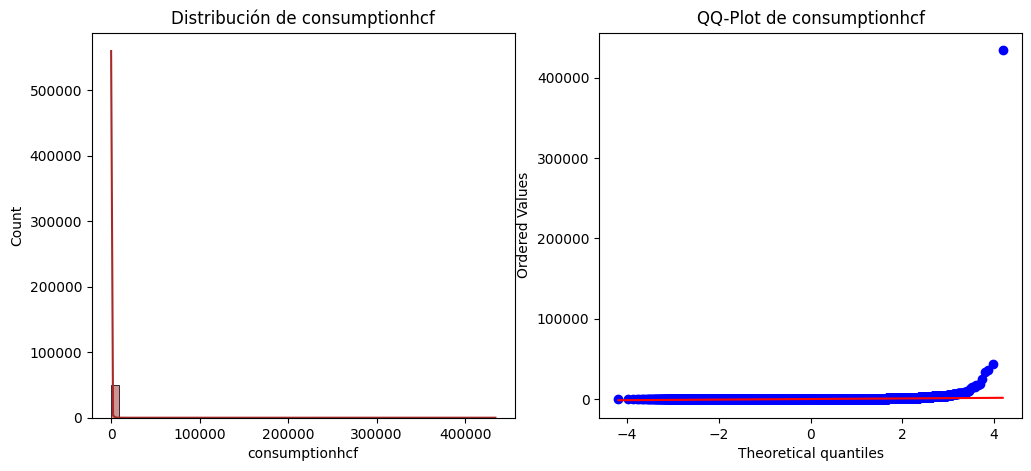


Pruebas de normalidad para la columna: consumptionhcf
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 14471.97155
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


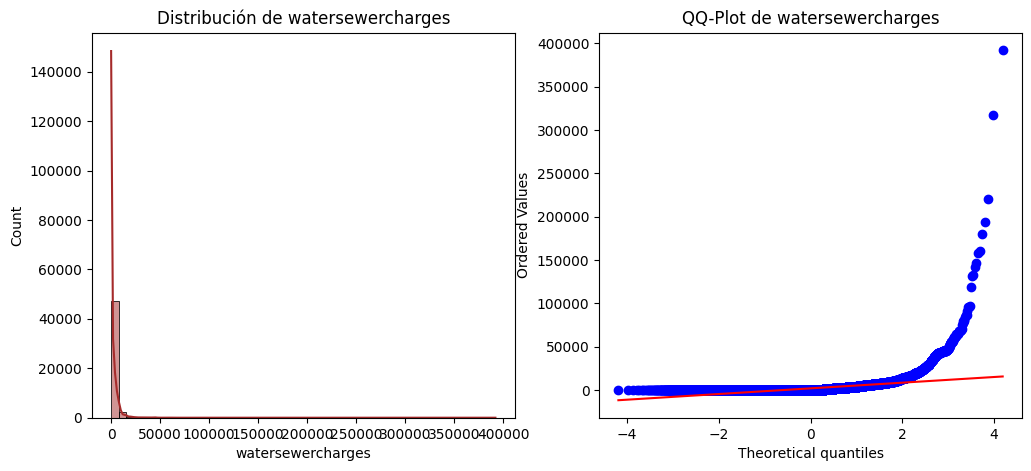


Pruebas de normalidad para la columna: watersewercharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 8098.94044
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


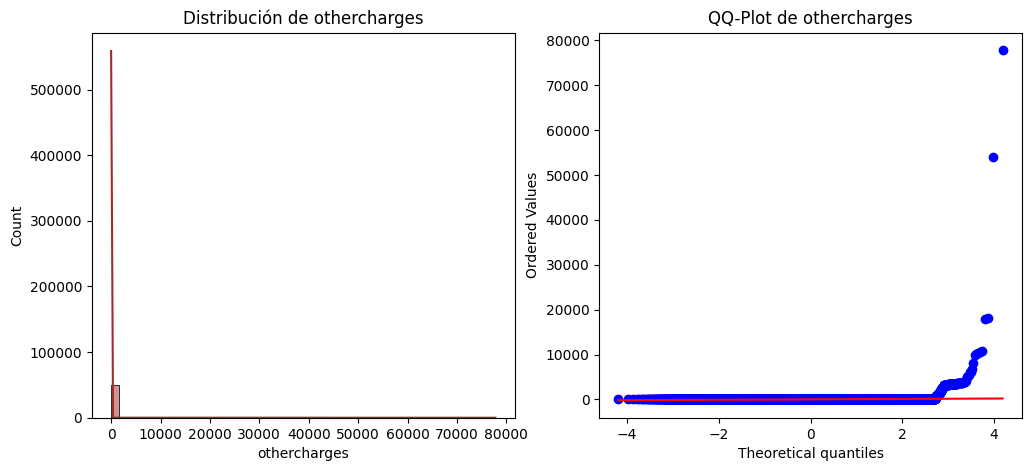


Pruebas de normalidad para la columna: othercharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 18924.46034
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [539]:
for column in columnas_numericas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

# **7. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados
RECUERDA AGREGAR UNA O VARIAS CELDAS DE CÓDIGO

# **8. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras

RECUERDA AGREGAR UNA O VARIAS CELDAS DE CÓDIGO